## Geely_Auto_Car_Price_Prediction_Assignment

**Problem Statement:** 

     A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

    They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

    The company wants to know the following things:
        Which variables are significant in predicting the price of a car?
        How well do those variables describe the price of a car?
        Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the American market. 

**Business Goals**

    You are required to model the price of cars with the available independent variables. The management will use this model to understand exactly how the prices vary with the independent variables. Accordingly, they can change the design of the cars, the business strategy, etc., to meet certain price levels. Further, the model will allow the management to understand the pricing dynamics of a new market.

#### Steps to follow:
     Step 1: Reading and Understanding the Data
     Step 2: Cleaning the Data
        -- Missing Value check
        -- Duplicate check
        -- Data type check 
     Step 3: Data Visualization
        -- Visualizing the target variable
        -- Visualizing categorical Variables
        --- Visualizing numerivcal Variables
     Step 4: Data Preparation
        -- Binning the Car Companies based on avg prices 
        -- Derive Metrics
     Step 5: Splitting the Data into Training and Testing Sets
         -- Rescaling the Features
         -- Dividing into X and Y sets for the model building
     Step 6: Building a Linear Model
         -- Feature selection Manual and RFE
         -- Dropping the variables based on VIF
     Step 7: Residual Analysis of the train data
     Step 8: Making Predictions Using the Final Model
     Step 9: Model Evaluation
        -- RMSE Score

### Step 1: Reading and Understanding the Data

In [636]:
# importing all libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings 
warnings.filterwarnings('ignore')


pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [637]:
#Importing dataset
df = pd.read_csv('CarPrice_Assignment.csv')

In [638]:
# shape of dataset
df.shape

(205, 26)

In [639]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### Observation
    From above output we can observe that 10 categorical & 16 numerical Attributes.

In [640]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


 ### Step 2: Cleaning the Data
    

### checking for the missing values in dataset

In [641]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() * 100 / len(df.index)).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


##### Observation
    1. We can observe that none of the features is having Missing values.

In [642]:
# checking for dupliacet values in dataset
df.loc[df.duplicated]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### Observation
1. We can observe that there is no duplicate values in dataset

In [643]:
# changing the datatype of symboling as it is categorical variable as per dictionary file
df['symboling'] =df['symboling'].astype('str')

In [644]:
# dropping car_ID 
df.drop(['car_ID'],axis=1,inplace=True)

In [645]:
df.shape

(205, 25)

##### Observation
    In the CarName Feature we can observe that the values are storing both the car's company name and the Car name.
    So we have to clean that Feature.
    We can separate the car company names from Carname Feature.

In [646]:
# Extracting Car Company from the CarName
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

In [647]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [648]:
# Unique Car company
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Observation
    1. There seems to be some spelling error in the CompanyName column.
            maxda = mazda
            Nissan = nissan
            porsche = porcshce
            toyota = toyouta
            vokswagen = volkswagen = vw
    2.So we have to replace those incorrect car company names wit correct company's name.

In [649]:
# Renaming the errors in Car Company names
df['CompanyName'] = df['CompanyName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 
                                               'toyouta': 'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [650]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Step 3: Data Visualization

Visualizing our target variable -- `price`.

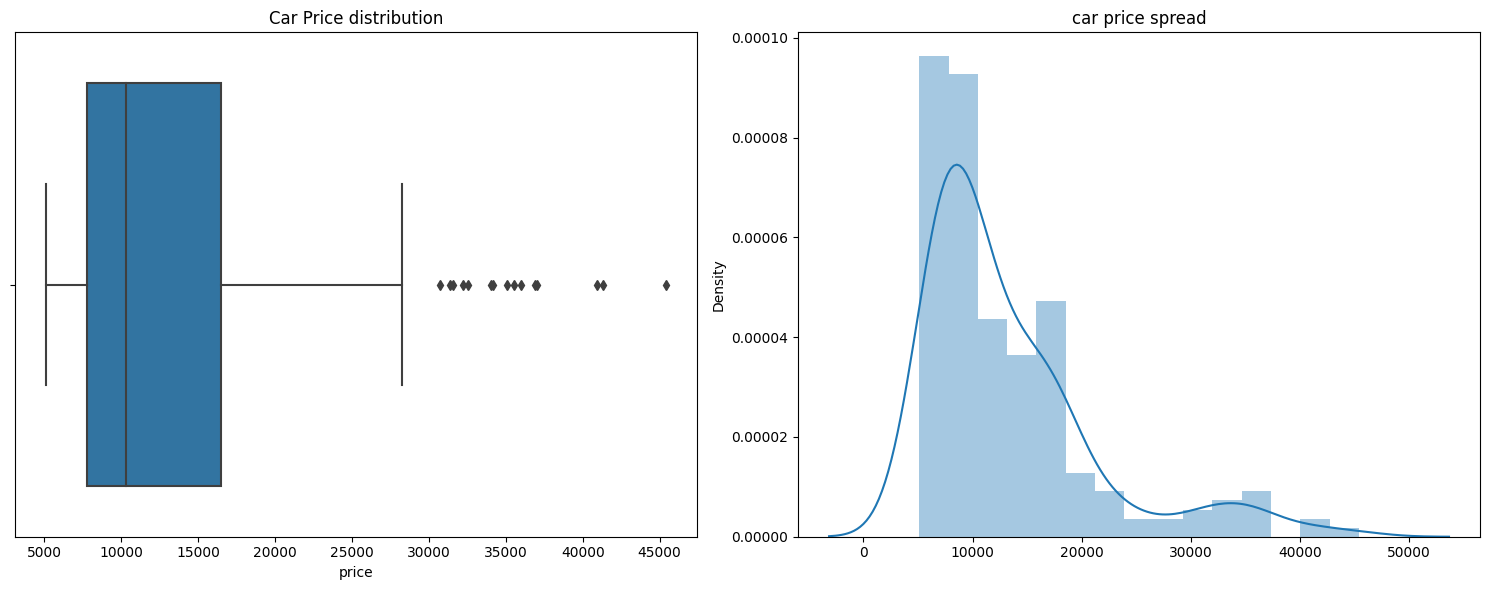

In [651]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(ax=ax[0], x=df['price'])
ax[0].set_title('Car Price distribution')
sns.distplot(ax=ax[1], x=df['price'], bins=15)
ax[1].set_title('car price spread')
plt.tight_layout()
plt.show()

In [652]:
print('Skewness:{0:.2f}'.format(df['price'].skew()))
print('kurtosis :{0:.2f}'.format(df['price'].kurt()))

Skewness:1.78
kurtosis :3.05


### Insights
    1.We can clearly observe that our Car Price Feature is Right Skewed.
    2.We can also make an insight that most of the car's price is below 14000.
    3.We can also that the skewness of the car price is above 1.5 which means that the data points are highly spread.

## Visualizing categorical Variables

Visualizing Total No. of cars sold by different company

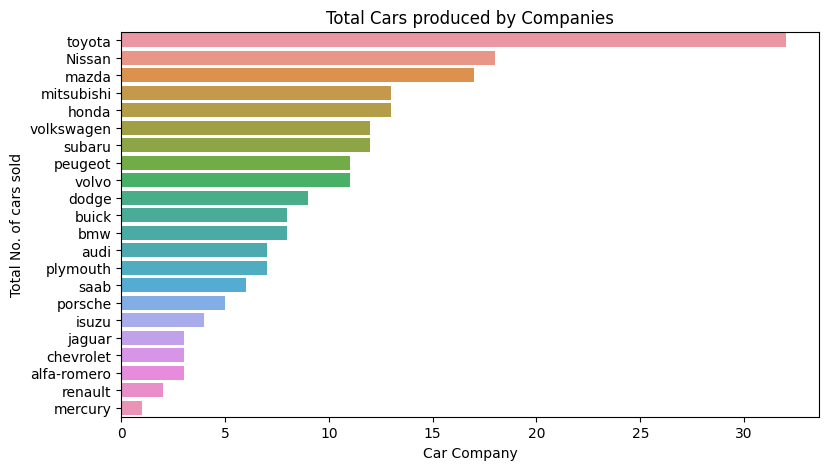

In [653]:
plt.figure(figsize=(9,5))
sns.countplot(data= df, y ='CompanyName', order=df['CompanyName'].value_counts().index)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies")
plt.show()

In [654]:
df[df["CompanyName"]=="mercury"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [655]:
df[df["CompanyName"]=="renault"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


#### Insights
    1.Toyota company has sold the highest number of cars.
    2.So we can say that Toyota is kind of customers most favoured company.
    3.Mercury , renault are having very low data-points. So we can't make any inference of least sold car companies.

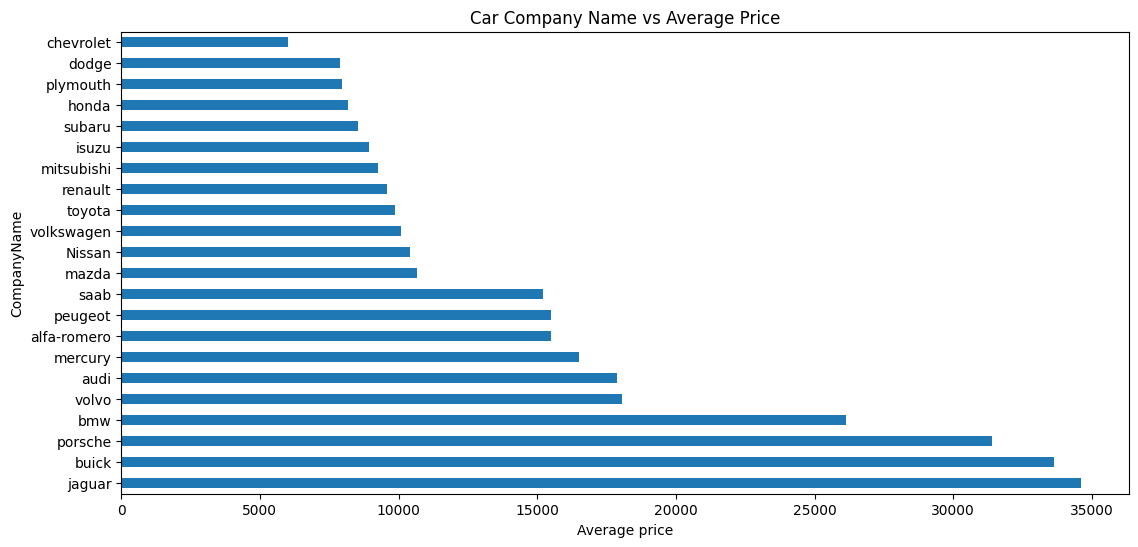

In [656]:
plt.figure(figsize=(13,6))
df.groupby('CompanyName')['price'].mean().sort_values(ascending=False).plot.barh()
plt.title('Car Company Name vs Average Price')
plt.xlabel("Average price")
plt.show()

#### Insights:
    1. Jaguar,Buick and porsche seems to have the highest average price.

### Visualising  Categorical Variables

In [657]:
def categorical_visualization(col):
    plt.figure(figsize=(17,6),dpi = 80)
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = col, order=df[col].value_counts().index,width = 0.5) 
    plt.title(f'{col} distribution')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.boxplot(data = df, x = col, y = 'price')
    plt.title(f"{col} vs Price")
    plt.xticks(rotation=90)
    plt.show()

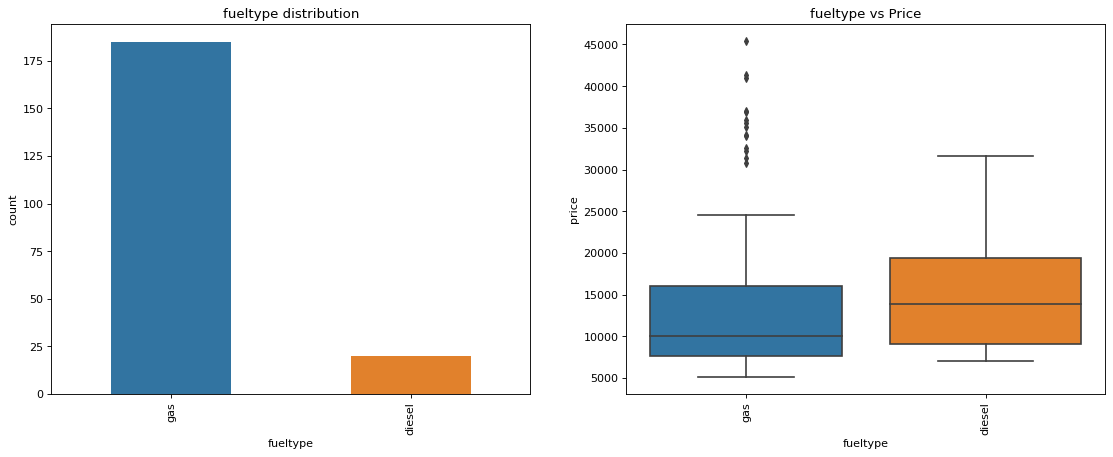

In [658]:
categorical_visualization('fueltype')

#### Insights:
     1.Cars having gas fuel system is mostly sold.
     2.Gas Fuel Sysytem cars are availabe within every price range
     3.Price of diesel car is much higher than of gas ones,also there are some outliers in gas vehicles

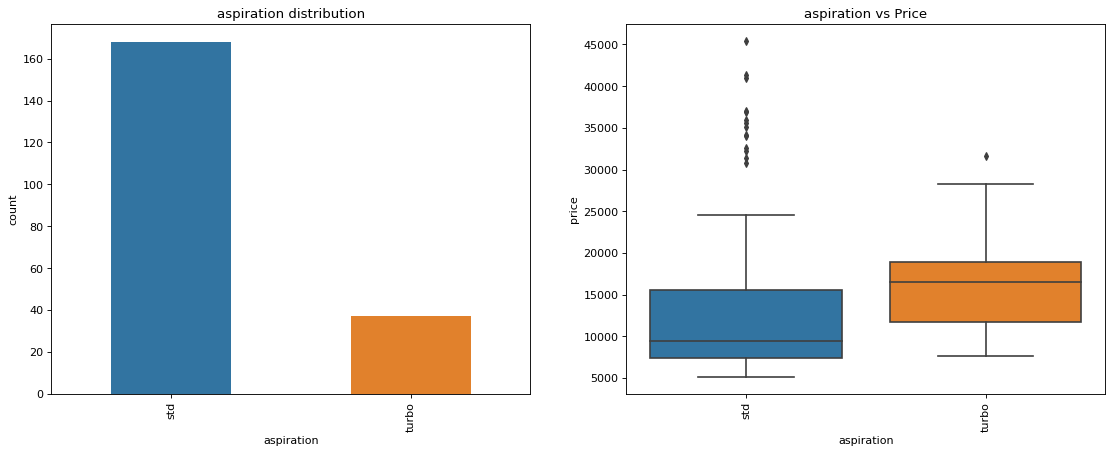

In [659]:
categorical_visualization('aspiration')

### Insights:
    1.Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
    2.Cars having Turbo Aspiration have higher price range than the STD Aspiration.

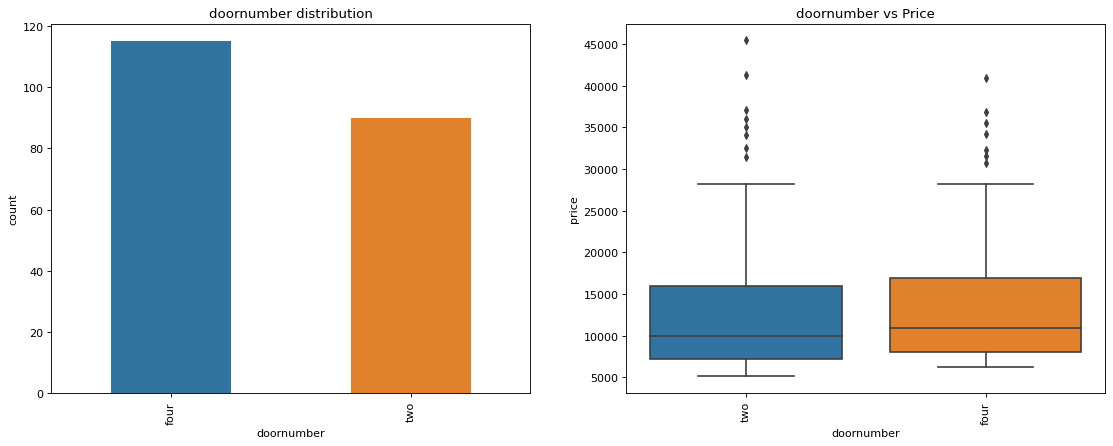

In [660]:
categorical_visualization('doornumber')

### Insights:
    Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors.
    Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors
    Door numbers category is not affecting the price that much.

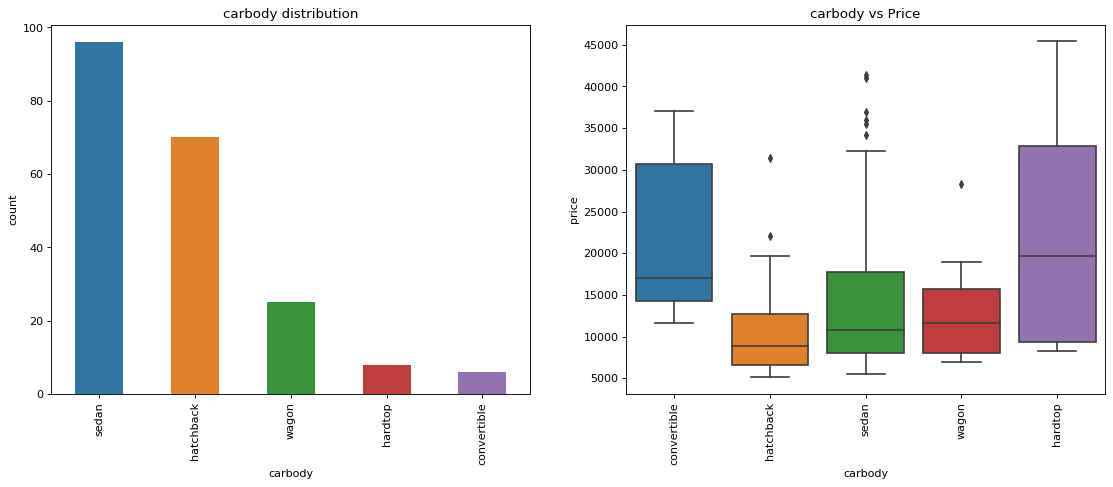

In [661]:
categorical_visualization('carbody')

####  Insights
    Cars having sedan body-type are mostly sold followed by hatchback.
    Cars having convertible or hardtop body-type are less sold.
    Cars having Hardtop body-type is the mostly expensive cars followed by convertible.
    Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
    Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

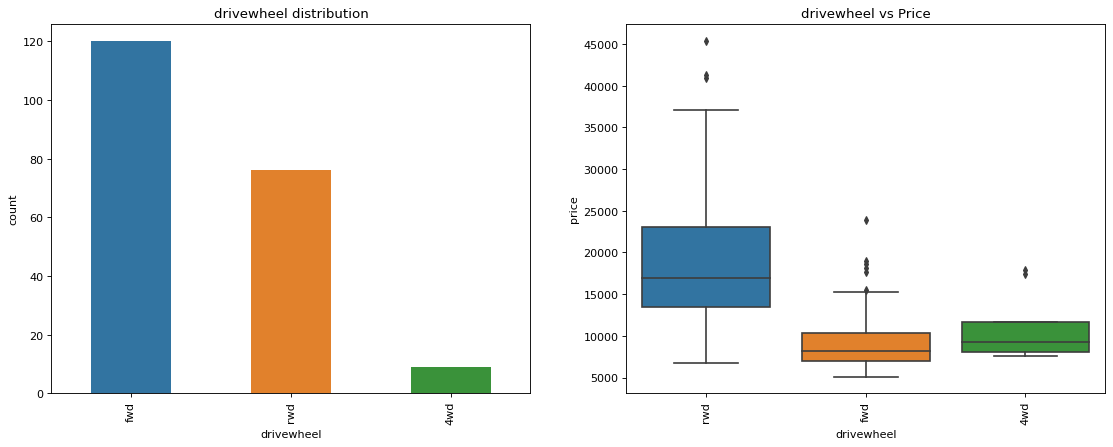

In [662]:
categorical_visualization('drivewheel')

#### Insights
    Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
    Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

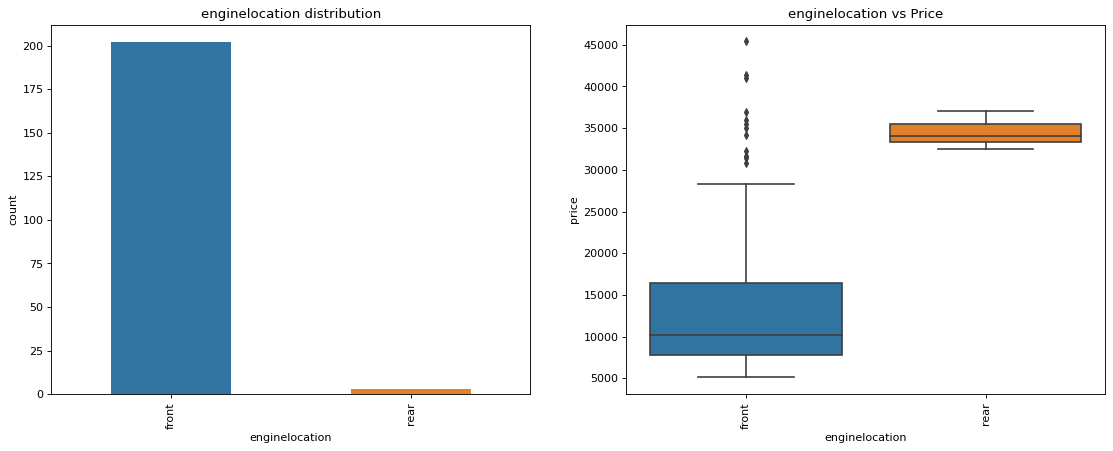

In [663]:
categorical_visualization('enginelocation')

In [664]:
df[df["enginelocation"]=="rear"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


#### Insights
    Most of the cars are having engine location in front.
    Note there are only 3 data-points for the rear category.
    So we can't make any inference of car price when compared with engine location.

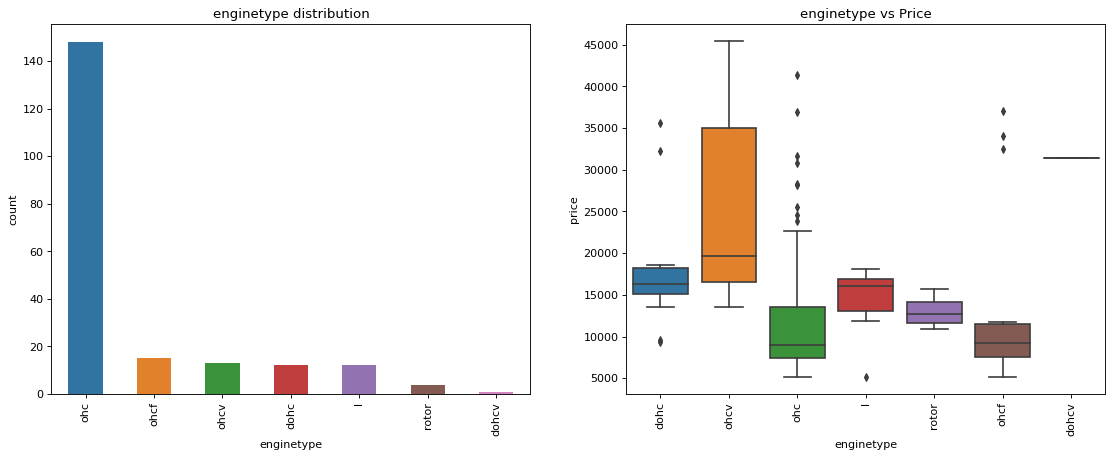

In [665]:
categorical_visualization('enginetype')

In [666]:
df[df["enginetype"]=="dohcv"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [667]:
df[df["enginetype"]=="rotor"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0


#### Insights:
    Cars having Overhead Camshaft (OHC) engines are mostly sold.
    Only one car has been sold having engine type dohcv.
    There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
    Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

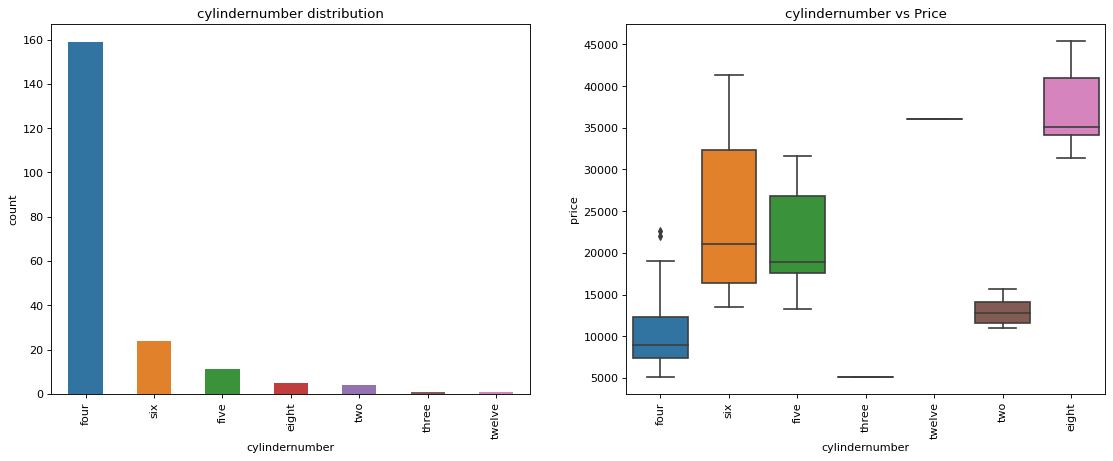

In [668]:
categorical_visualization('cylindernumber')

In [669]:
df[df["cylindernumber"]=="three"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [670]:
df[df["cylindernumber"]=="twelve"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


### Insights
    Most of the cars are having Four cyclinders followed by cars having six cyclinders.
    There are only one data-point each for car having Three & Twelve data-points.
    Cars having eight cyclinders are most expensive cars followed by six cyclinders.

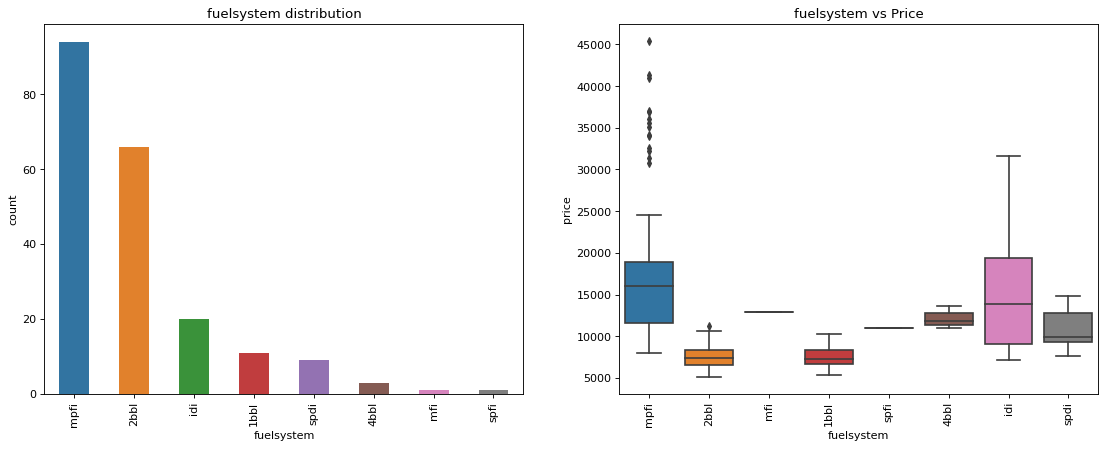

In [671]:
categorical_visualization('fuelsystem')

In [672]:
df[df["fuelsystem"]=="mfi"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [673]:
df[df["fuelsystem"]=="spfi"]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


### Insight
    Most of the cars are having mpfi & 2bbl fuelsystems.
    Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
    There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

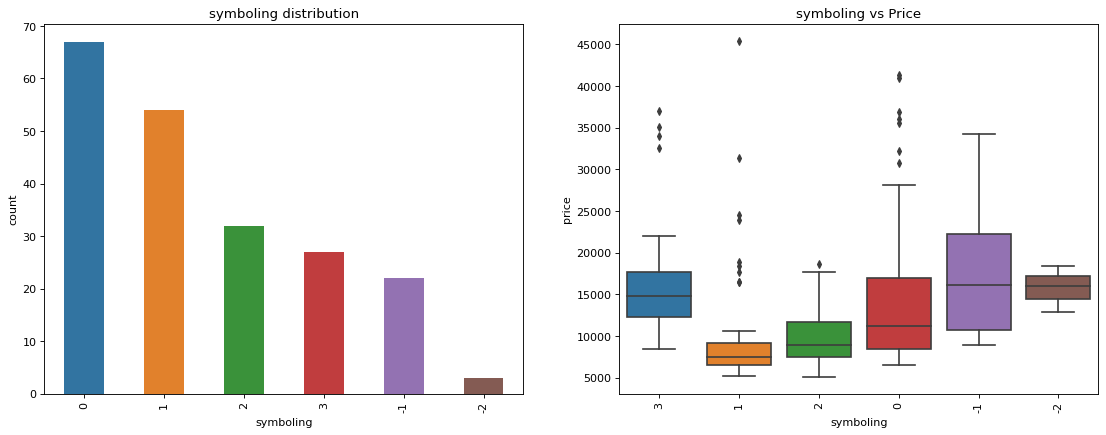

In [674]:
categorical_visualization('symboling')

### Insights
    We can clearly observe cars having symboling 0 or 1 are motly preferred.
    We can aslo observe that symboling -1, 0, 3 are expensive.

## Visualizing numerivcal Variables

In [675]:
def scatter_plots(cols):
    x = 1
    plt.figure(figsize=(14,5))
    for i in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(data=df,x = i, y = 'price',color = 'blue')
        plt.title(f"{i} vs Price")
        plt.tight_layout()
        x+=1        

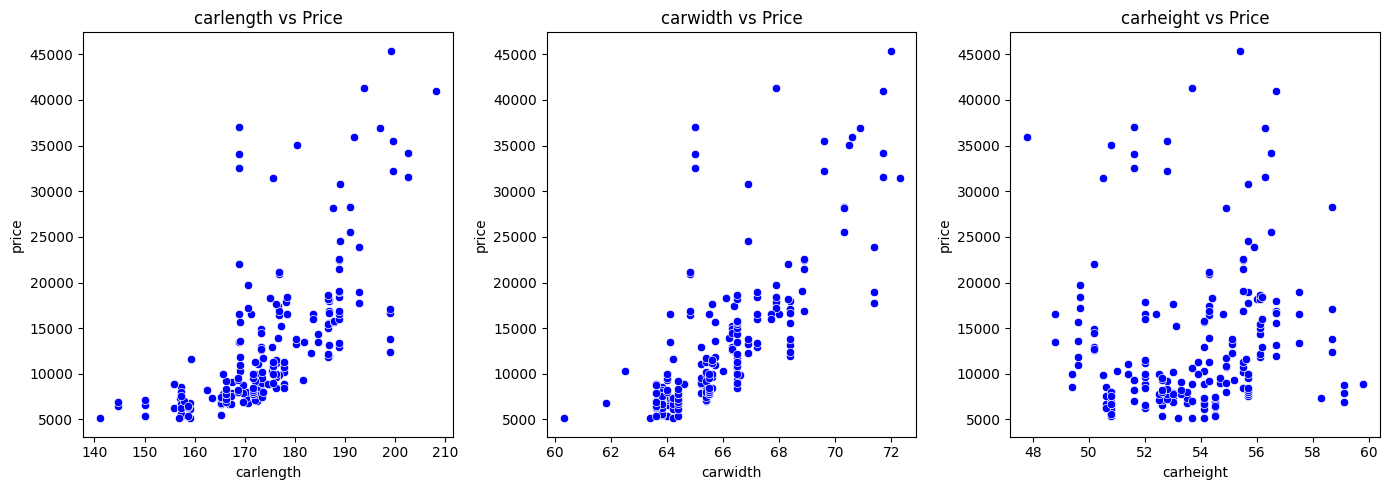

In [676]:
scatter_plots(['carlength','carwidth','carheight'])

#### Insights
    We can clearly observe that carlength & carwidth features are highly correlated with the price feature.
    So we can make an insight that with increment in length & width of the car there is an increment in price too.
    From carheight vs price we can't make any inference as the data-points are too scattered.

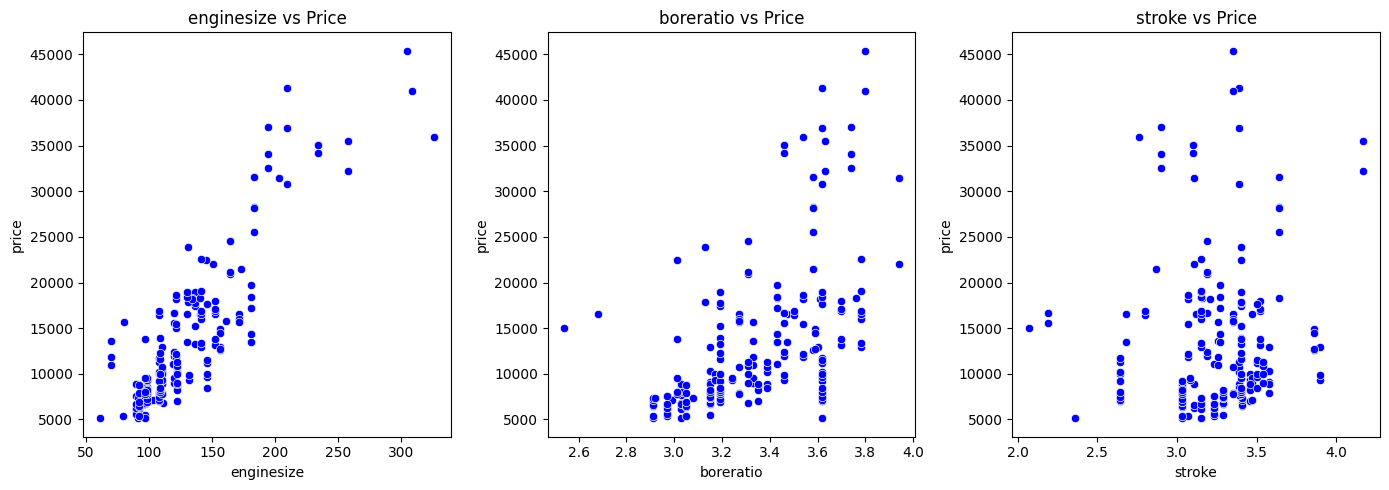

In [677]:
scatter_plots(['enginesize', 'boreratio', 'stroke'])

#### Insights
    We can clearly observe that Enginesize is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.
    From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.
    From Stroke vs Price we can't make any inference as the data-points are too scattered.
    Since Stroke is not affecting Price that much. We can drop this feature.

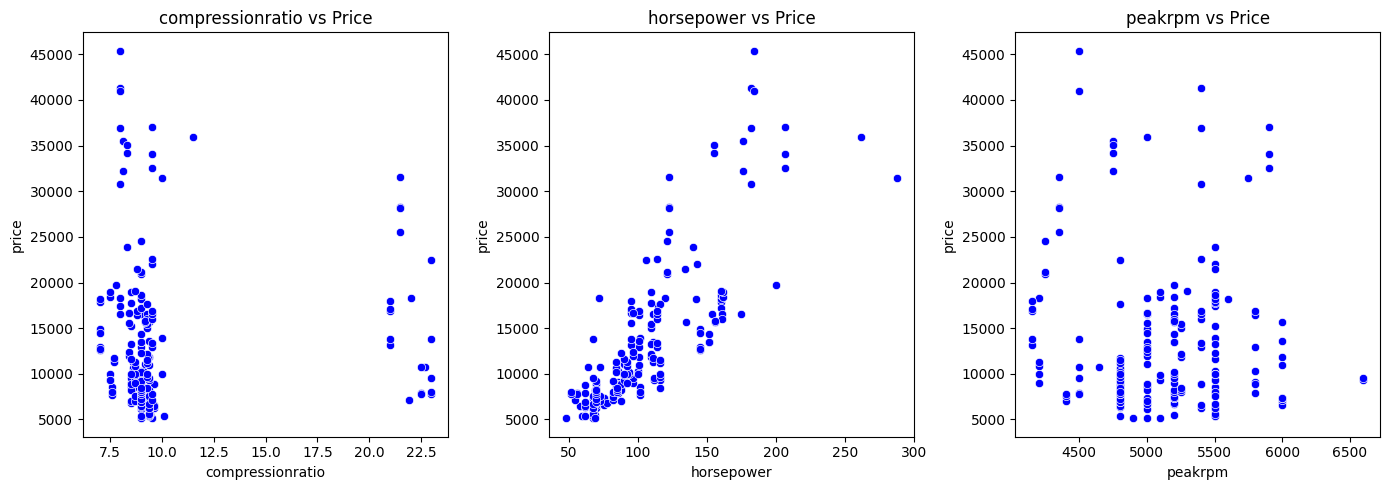

In [678]:
scatter_plots(["compressionratio","horsepower","peakrpm"])

#### Insights
    We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
    From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.
    SInce Compressionratio & Peakrpm is not affecting price. So we can drop this features.

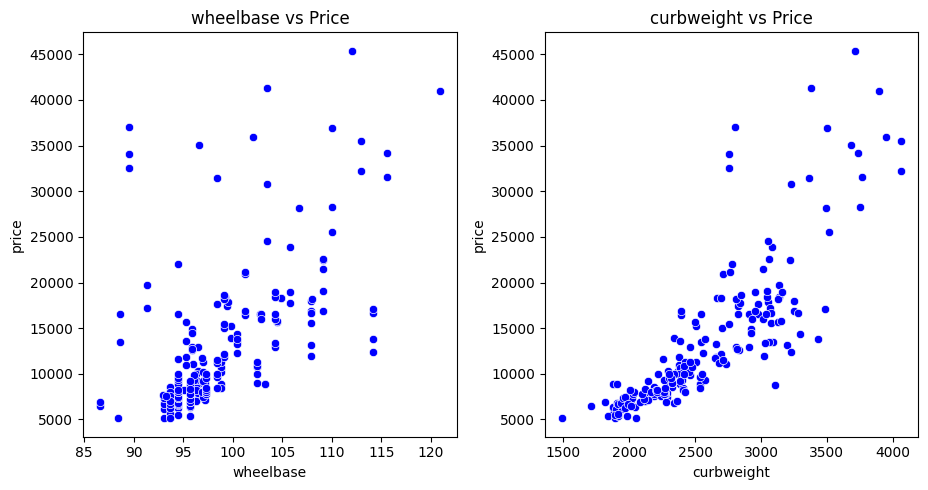

In [679]:
scatter_plots(["wheelbase","curbweight"])

##### Insights:
    We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
    From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.

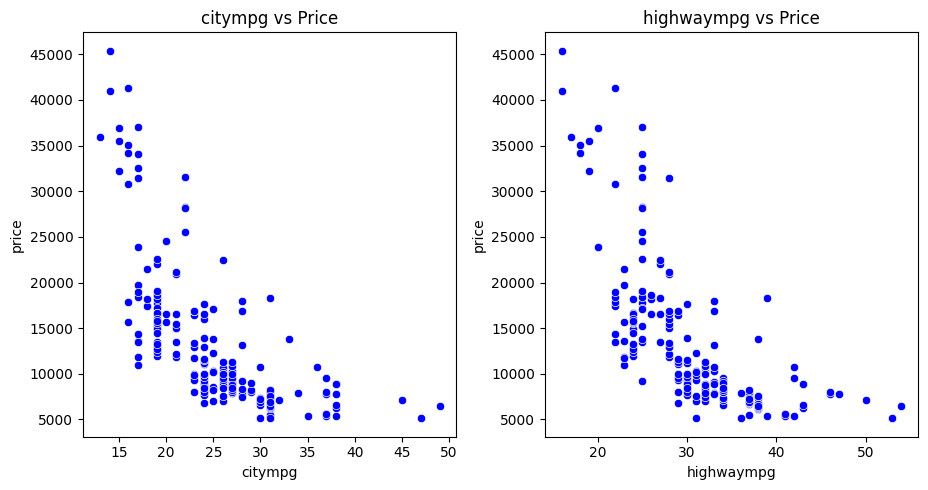

In [680]:
scatter_plots(['citympg', 'highwaympg'])

#### Insights
    We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
    So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
    So our both Citympg & Highwaympg are useful features for price prediction.

In [681]:
num_col =  df.select_dtypes(include=['int','float']).columns

In [682]:
def correlation_table(df,target_variable,num_col):    
    corr_df = pd.DataFrame(df[num_col].corrwith(df[target_variable]), columns =['Correlation'])
    corr_df['absolute_correlation'] = abs(corr_df['Correlation'])
    corr_df.sort_values(by=['absolute_correlation'], ascending= False,inplace=True)
    print(corr_df)

correlation_table(df,'price',num_col)

                  Correlation  absolute_correlation
price                1.000000              1.000000
enginesize           0.874145              0.874145
curbweight           0.835305              0.835305
horsepower           0.808139              0.808139
carwidth             0.759325              0.759325
highwaympg          -0.697599              0.697599
citympg             -0.685751              0.685751
carlength            0.682920              0.682920
wheelbase            0.577816              0.577816
boreratio            0.553173              0.553173
carheight            0.119336              0.119336
peakrpm             -0.085267              0.085267
stroke               0.079443              0.079443
compressionratio     0.067984              0.067984


**enginesize, curbweight, horsepower, carwidth, carlength, wheelbase, boreratio** these attributes show **positive correleation with price**,<br>
whereas **highwaympg, citympg** shows **negative correlation with price**

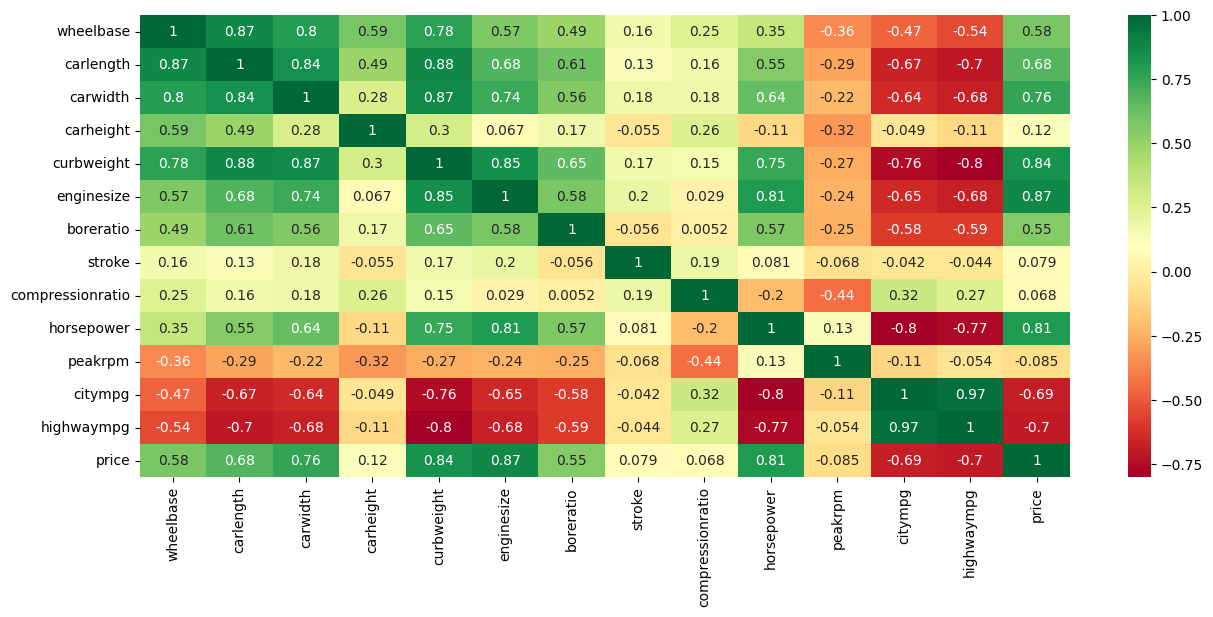

In [683]:
plt.figure(figsize=(15,6))
sns.heatmap(df[num_col].corr(),annot=True,cmap='RdYlGn')

plt.show()

#### Insights
    wheelbase has high posotive correleation with carlength,carwidth, curbweigth
    carlength has high negative correleation with highwaympg, citympy
    carwidth has high positive correleation with enginesize,curbweight 
    curbweight has high positive correleation with enginesize,carlength, curbweigth,horsepower
    curbweight has high negative correleation  with citympg and highwaympg
    enginesize has high positive correleation with horsepower
    citympg, highwaympy has high negative correleation with horsepower,curbweight

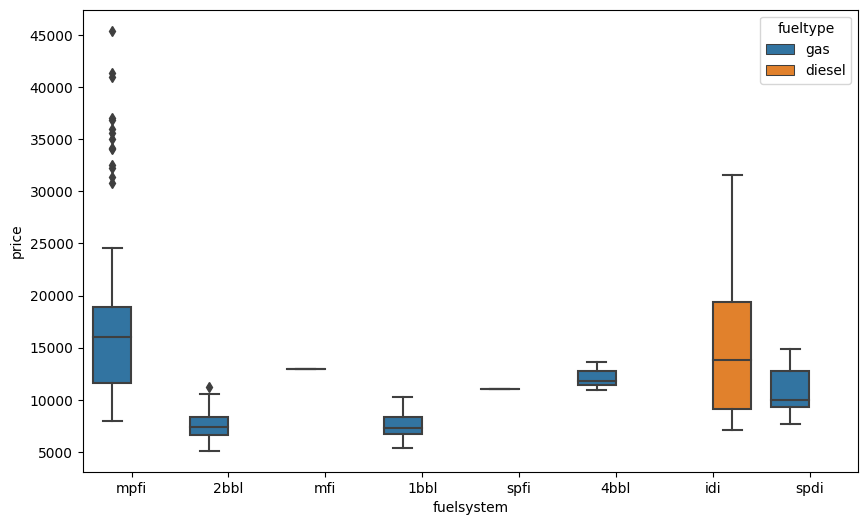

In [684]:
# Relationship between fuelsystem vs price with hue fueltype
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

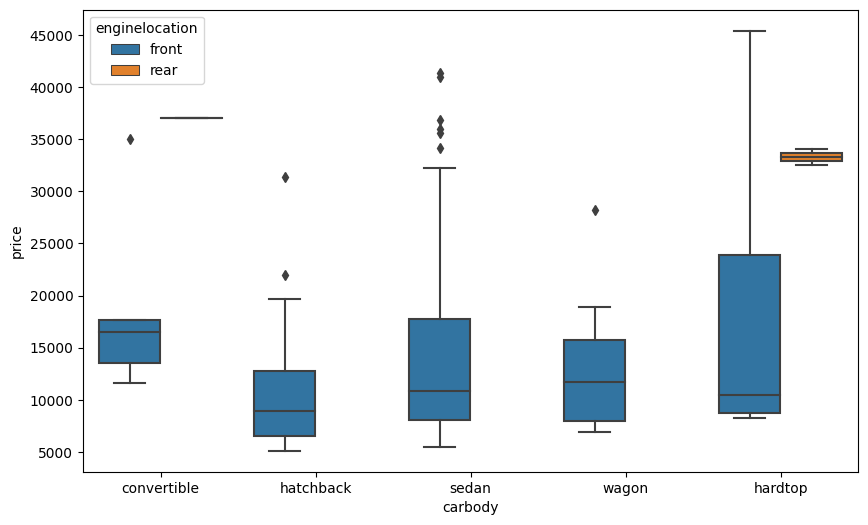

In [685]:
#Relationship between carbody vs price with hue enginelocation
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

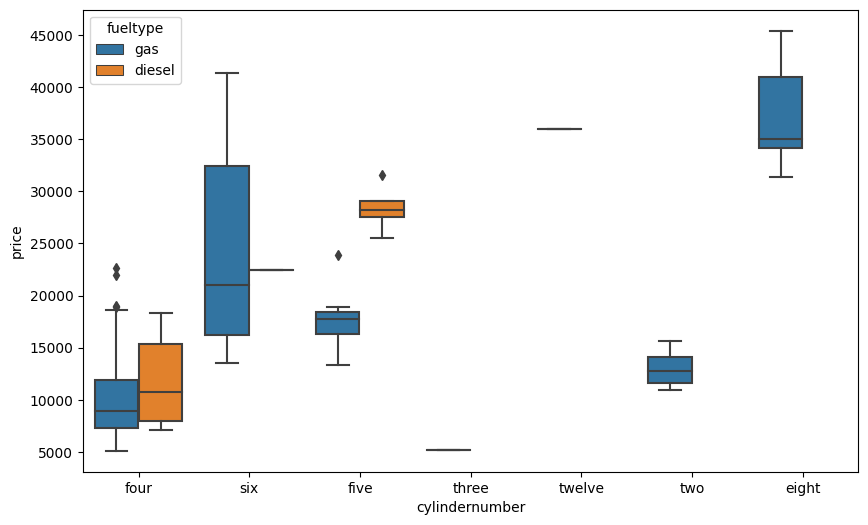

In [686]:
#Relationship between cylindernumber vs price with hue fueltype
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

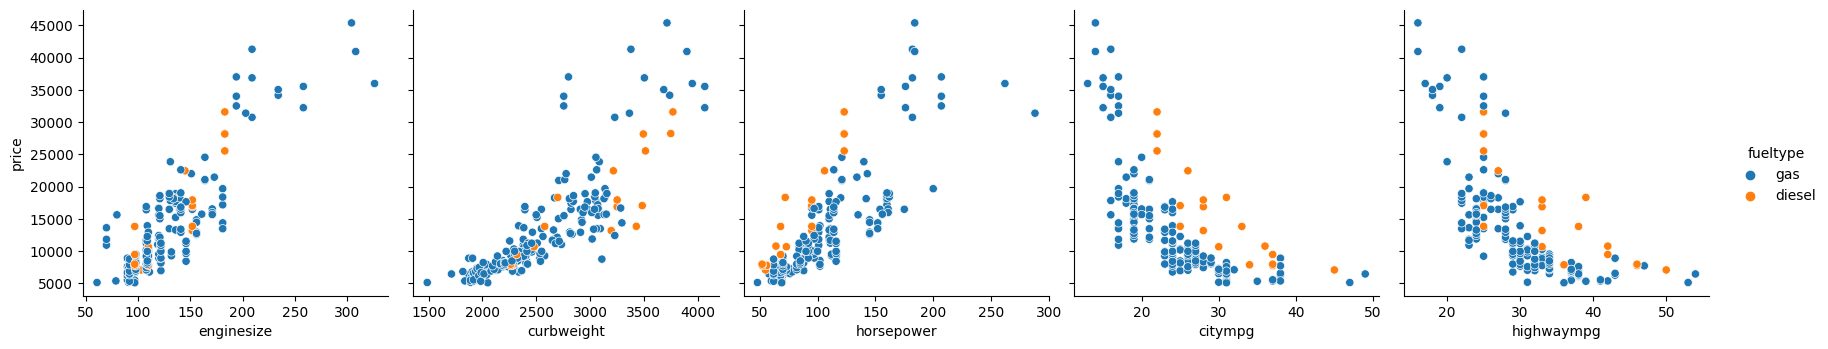

In [687]:
sns.pairplot(data=df,x_vars=['enginesize', 'curbweight', 'horsepower','citympg', 'highwaympg'],y_vars='price',hue='fueltype',height=3.5)
plt.show()

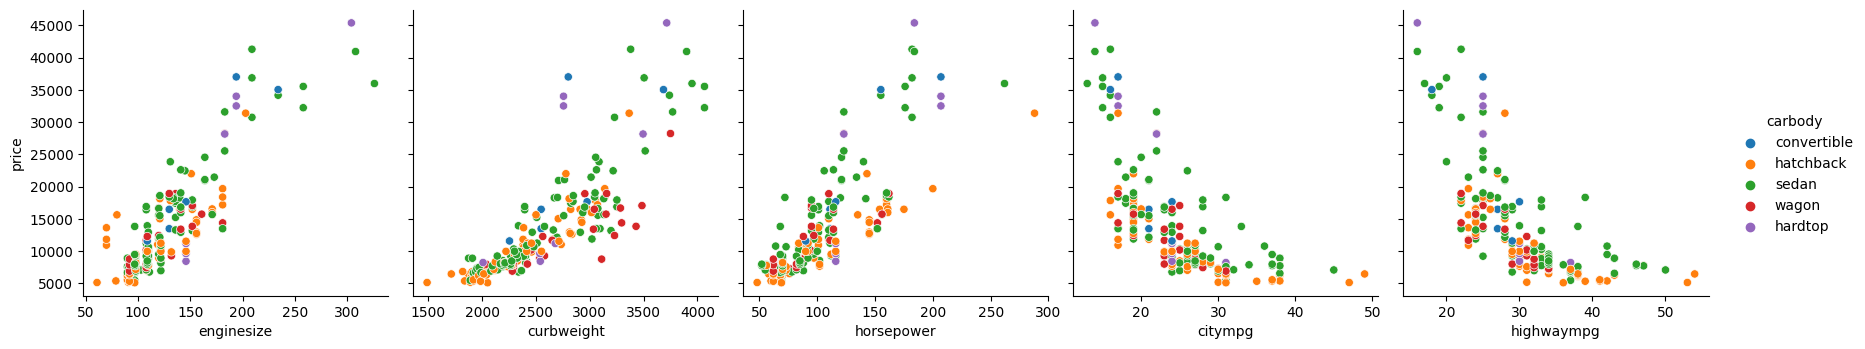

In [688]:
sns.pairplot(data=df,x_vars=['enginesize', 'curbweight', 'horsepower','citympg', 'highwaympg'],y_vars='price',hue='carbody',height=3.5)
plt.show()

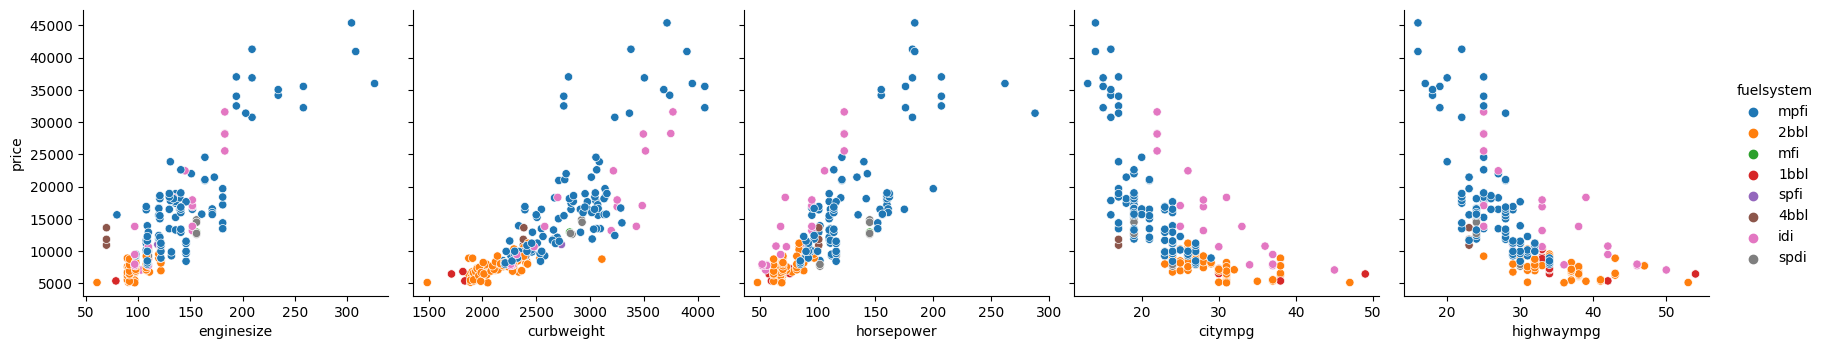

In [689]:
sns.pairplot(data=df,x_vars=['enginesize', 'curbweight', 'horsepower','citympg', 'highwaympg'],y_vars='price',hue='fuelsystem',height=3.5)
plt.show()

### Step 4:Data Preparation

#### Binning the Car Companies based on avg prices of each car Company.

In [690]:
df['price'] =df['price'].astype('int')

In [691]:
p = df.groupby('CompanyName')['price'].mean()
p

CompanyName
Nissan         10415.666667
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [692]:
df = df.merge(p.reset_index(),on='CompanyName',how = 'left')

In [693]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,price_y
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,15498.333333
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,15498.333333
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,15498.333333
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,17859.142857
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,17859.142857


In [694]:
df['car_category'] = pd.cut(df['price_y'],bins= [0,10000,20000,40000],right= False,labels=['Budget_Friendly','Medium_Range','TopNotch_Cars'])

In [695]:
df.sample(10)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,price_y,car_category
38,0,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2289,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095,8184.692308,Budget_Friendly
107,0,peugeot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3020,l,four,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900,15489.090909,Medium_Range
28,-1,dodge,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921,7875.444444,Budget_Friendly
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,15498.333333,Medium_Range
110,0,peugeot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95,4150,25,25,13860,15489.090909,Medium_Range
105,3,Nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699,10415.666667,Medium_Range
103,0,Nissan,gas,std,four,sedan,fwd,front,100.4,184.6,66.5,55.1,3060,ohcv,six,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499,10415.666667,Medium_Range
109,0,peugeot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3230,l,four,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440,15489.090909,Medium_Range
63,0,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795,10652.882353,Medium_Range
149,0,subaru,gas,turbo,four,wagon,4wd,front,96.9,173.6,65.4,54.9,2650,ohcf,four,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694,8541.250000,Budget_Friendly


In [696]:
df['car_category'].value_counts()

car_category
Budget_Friendly    95
Medium_Range       86
TopNotch_Cars      24
Name: count, dtype: int64

In [697]:
df.rename(columns={'price_x':'price','price_y':'mean_price'},inplace=True)

#### Derive Metrics
    There some features which are strongly correlated to each other. 
    We can nullify this by creating new ratio variables consisting of these correlated features
    creating new column namely 
        -- car length / car width
        -- car width / car height
        -- horsepower / car curb weight
        -- highway  mileage/ city  mileage

In [698]:
df.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'mean_price',
       'car_category'],
      dtype='object')

In [699]:
df['len/width'] = df.carlength/df.carwidth

df['len/width'].sample(7)

67     2.715505
42     2.562121
174    2.640602
187    2.621374
24     2.465517
129    2.430152
39     2.690184
Name: len/width, dtype: float64

In [700]:
df['width/ht'] = df.carwidth/df.carheight

df['width/ht'].sample(7)

169    1.261538
159    1.219697
45     1.223077
50     1.186691
117    1.219643
198    1.195730
76     1.267717
Name: width/ht, dtype: float64

In [701]:
df['power/wt'] = df.horsepower/df.curbweight

df['power/wt'].sample(7)

194    0.039148
75     0.060137
25     0.034188
44     0.037353
140    0.032589
183    0.038479
141    0.038228
Name: power/wt, dtype: float64

In [702]:
df['high/city'] = df.highwaympg/df.citympg

df['high/city'].sample(7)

73     1.142857
78     1.225806
39     1.222222
197    1.166667
24     1.225806
134    1.333333
29     1.263158
Name: high/city, dtype: float64

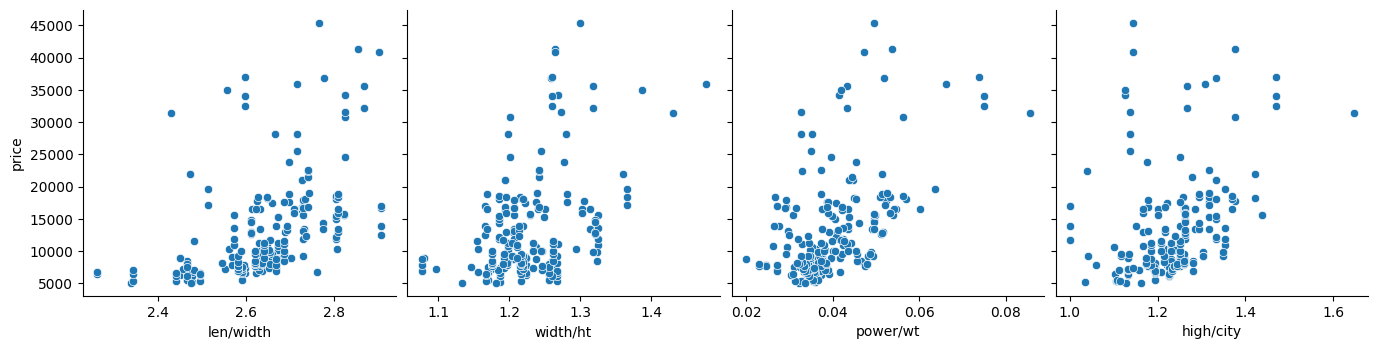

In [703]:
sns.pairplot(x_vars=['len/width','width/ht','power/wt','high/city'],y_vars='price',data=df,height=3.5)
plt.show()

In [704]:
a = ['len/width','width/ht','power/wt','high/city']
correlation_table(df,'price',a)

           Correlation  absolute_correlation
power/wt      0.533766              0.533766
len/width     0.498722              0.498722
width/ht      0.401511              0.401511
high/city     0.339154              0.339154


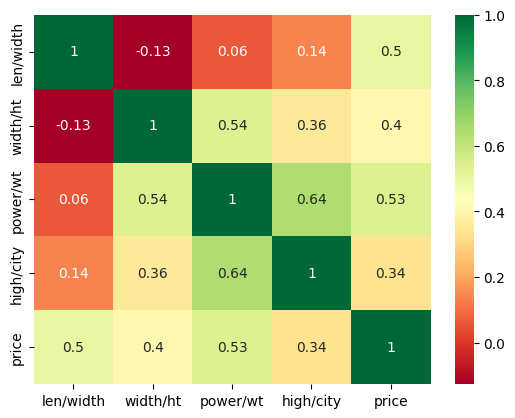

In [705]:
b = ['len/width','width/ht','power/wt','high/city','price']
sns.heatmap(data=df[b].corr(),annot=True,cmap='RdYlGn')
plt.show()

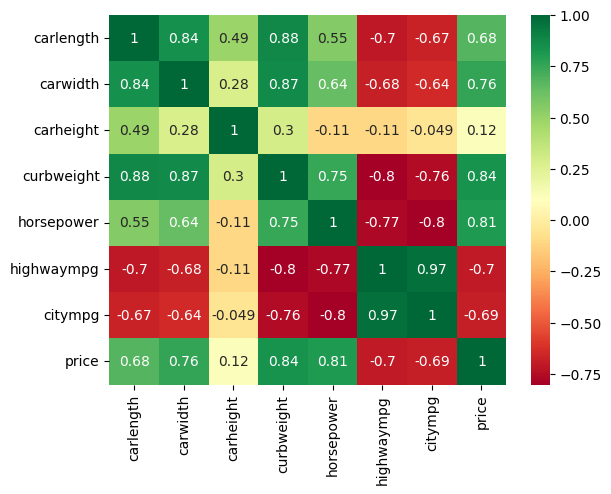

In [706]:
c = ['carlength','carwidth','carheight','curbweight','horsepower','highwaympg','citympg','price']
sns.heatmap(data=df[c].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [707]:
# droping the orignal variables
df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

In [708]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mean_price,car_category,len/width,width/ht,power/wt,high/city
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495,15498.333333,Medium_Range,2.633385,1.313525,0.043564,1.285714
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500,15498.333333,Medium_Range,2.633385,1.313525,0.043564,1.285714
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500,15498.333333,Medium_Range,2.613740,1.250000,0.054552,1.368421
3,2,audi,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950,17859.142857,Medium_Range,2.667674,1.219153,0.043646,1.250000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450,17859.142857,Medium_Range,2.659639,1.222836,0.040722,1.222222


In [709]:
# Segregation of Numerical and Categorical Variables/Columns
col_obj= df.select_dtypes(include=['object']).columns

In [710]:
col_int= df.select_dtypes(include=['int','float']).columns

In [711]:
# correlation between price and all numeric variables.
correlation_table(df,'price',col_int)

                  Correlation  absolute_correlation
price                1.000000              1.000000
mean_price           0.895520              0.895520
enginesize           0.874145              0.874145
curbweight           0.835305              0.835305
horsepower           0.808138              0.808138
wheelbase            0.577816              0.577816
boreratio            0.553174              0.553174
power/wt             0.533766              0.533766
len/width            0.498722              0.498722
width/ht             0.401511              0.401511
high/city            0.339154              0.339154
peakrpm             -0.085268              0.085268
stroke               0.079443              0.079443
compressionratio     0.067984              0.067984


In [712]:
col_int

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'mean_price',
       'len/width', 'width/ht', 'power/wt', 'high/city'],
      dtype='object')

In [713]:
col_obj

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    object  
 1   CompanyName       205 non-null    object  
 2   fueltype          205 non-null    object  
 3   aspiration        205 non-null    object  
 4   doornumber        205 non-null    object  
 5   carbody           205 non-null    object  
 6   drivewheel        205 non-null    object  
 7   enginelocation    205 non-null    object  
 8   wheelbase         205 non-null    float64 
 9   curbweight        205 non-null    int64   
 10  enginetype        205 non-null    object  
 11  cylindernumber    205 non-null    object  
 12  enginesize        205 non-null    int64   
 13  fuelsystem        205 non-null    object  
 14  boreratio         205 non-null    float64 
 15  stroke            205 non-null    float64 
 16  compressionratio  205 non-

#### Significant variables after Visualization
    -- wheelbase, curbweight, enginesize, 
    -- compressionratio, horsepower, price, 
    -- len/width, width/ht, power/wt, high/city,           
    -- symboling, fueltype, aspiration,
    -- carbody, drivewheel, enginetype,
    -- cylindernumber, fuelsystem,car_category.

In [715]:
# Significant variables after Visualization
sig_col = ['wheelbase', 'curbweight', 'enginesize', 
       'compressionratio', 'horsepower', 'price', 
       'len/width', 'width/ht', 'power/wt', 'high/city',           
          'symboling', 'fueltype', 'aspiration',
       'carbody', 'drivewheel', 'enginetype',
       'cylindernumber', 'fuelsystem','car_category']

In [716]:
len(sig_col)

19

In [717]:
new_df = df[sig_col]

In [718]:
new_df.sample(7)

,wheelbase,curbweight,enginesize,compressionratio,horsepower,price,len/width,width/ht,power/wt,high/city,symboling,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,car_category
163,94.5,2169,98,9.0,70,8058,2.635937,1.216730,0.032273,1.172414,1,gas,std,sedan,rwd,ohc,four,2bbl,Budget_Friendly
66,104.9,2700,134,22.0,72,18344,2.647504,1.215074,0.026667,1.258065,0,diesel,std,sedan,rwd,ohc,four,idi,Medium_Range
40,96.5,2372,110,9.0,86,10295,2.806400,1.155268,0.036256,1.222222,0,gas,std,sedan,fwd,ohc,four,1bbl,Budget_Friendly
104,91.3,3071,181,9.0,160,17199,2.513991,1.366197,0.052100,1.315789,3,gas,std,hatchback,rwd,ohcv,six,mpfi,Medium_Range
25,93.7,1989,90,9.4,68,6692,2.465517,1.260870,0.034188,1.225806,1,gas,std,sedan,fwd,ohc,four,2bbl,Budget_Friendly
116,107.9,3252,152,21.0,95,17950,2.729532,1.206349,0.029213,1.178571,0,diesel,turbo,sedan,rwd,l,four,idi,Medium_Range
50,93.1,1890,91,9.0,68,5195,2.478193,1.186691,0.035979,1.033333,1,gas,std,hatchback,fwd,ohc,four,2bbl,Medium_Range


#### Dummy variables
Converting other categorical variables with more than two levels to dummy variables. We have to create (n-1) dummy variables by removing the base status. n is the number of levels of the variables

In [719]:
# Get the dummy variables for the categorical feature and store it in a new variable - dummies
dum_var = ['symboling', 'fueltype', 'aspiration',
       'carbody', 'drivewheel', 'enginetype',
       'cylindernumber', 'fuelsystem','car_category']

new_df = pd.get_dummies(data = new_df,columns=dum_var,dtype=float,drop_first=True)

In [720]:
new_df.head()

,wheelbase,curbweight,enginesize,compressionratio,horsepower,price,len/width,width/ht,power/wt,high/city,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_category_Medium_Range,car_category_TopNotch_Cars
0,88.6,2548,130,9.0,111,13495,2.633385,1.313525,0.043564,1.285714,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,88.6,2548,130,9.0,111,16500,2.633385,1.313525,0.043564,1.285714,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,94.5,2823,152,9.0,154,16500,2.613740,1.250000,0.054552,1.368421,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,99.8,2337,109,10.0,102,13950,2.667674,1.219153,0.043646,1.250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,99.4,2824,136,8.0,115,17450,2.659639,1.222836,0.040722,1.222222,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [721]:
new_df.describe()

,wheelbase,curbweight,enginesize,compressionratio,horsepower,price,len/width,width/ht,power/wt,high/city,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_category_Medium_Range,car_category_TopNotch_Cars
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,2555.565854,126.907317,10.142537,104.117073,13276.702439,2.638502,1.228806,0.040063,1.232268,0.014634,0.326829,0.263415,0.156098,0.131707,0.902439,0.180488,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878,0.419512,0.117073
std,6.021776,520.680204,41.642693,3.972040,39.544167,7988.848977,0.123923,0.059477,0.009570,0.088901,0.120377,0.470202,0.441564,0.363836,0.339000,0.297446,0.385535,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843,0.494687,0.322294
min,86.600000,1488.000000,61.000000,7.000000,48.000000,5118.000000,2.262911,1.076142,0.019936,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,2145.000000,97.000000,8.600000,70.000000,7788.000000,2.582298,1.191956,0.034188,1.185185,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,2414.000000,120.000000,9.000000,95.000000,10295.000000,2.640602,1.219153,0.037801,1.230769,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,2935.000000,141.000000,9.400000,116.000000,16503.000000,2.715505,1.260870,0.044489,1.263158,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,120.900000,4066.000000,326.000000,23.000000,288.000000,45400.000000,2.907895,1.476987,0.085561,1.647059,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [722]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio
df_train,df_test = train_test_split(new_df,test_size=0.3,random_state = 100)

In [723]:
print(df_train.shape)
print(df_test.shape)

(143, 44)
(62, 44)


#### Rescaling the Features
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

we use Min-Max scaling

In [724]:
scaler = MinMaxScaler()

In [725]:
scale_var =['wheelbase', 'curbweight', 'enginesize', 
       'compressionratio', 'horsepower', 'price', 
       'len/width', 'width/ht', 'power/wt', 'high/city']  
# Applying the scaling on continuous numerical variables

df_train[scale_var] = scaler.fit_transform(df_train[scale_var])

In [726]:
df_train.head()

,wheelbase,curbweight,enginesize,compressionratio,horsepower,price,len/width,width/ht,power/wt,high/city,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_category_Medium_Range,car_category_TopNotch_Cars
122,0.244828,0.272692,0.139623,0.15000,0.083333,0.068818,0.557140,0.448461,0.169146,0.348974,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.272414,0.500388,0.339623,0.15625,0.395833,0.466890,0.325594,0.709540,0.480607,0.650718,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
166,0.272414,0.314973,0.139623,0.15000,0.266667,0.122110,0.578350,0.350729,0.438242,0.178322,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.068966,0.411171,0.260377,0.12500,0.262500,0.314446,0.574393,0.592205,0.360040,0.441558,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
199,0.610345,0.647401,0.260377,0.03125,0.475000,0.382131,0.847483,0.230896,0.478148,0.454545,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [727]:
df_train.describe()

,wheelbase,curbweight,enginesize,compressionratio,horsepower,price,len/width,width/ht,power/wt,high/city,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_category_Medium_Range,car_category_TopNotch_Cars
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.411141,0.407878,0.241351,0.190787,0.227302,0.219309,0.571441,0.387705,0.301305,0.355073,0.013986,0.349650,0.300699,0.118881,0.125874,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.412587,0.118881
std,0.205581,0.211269,0.154619,0.237181,0.165511,0.215682,0.194278,0.153936,0.139794,0.139367,0.117845,0.478536,0.460174,0.324786,0.332873,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.272414,0.245539,0.135849,0.100000,0.091667,0.067298,0.474597,0.291396,0.218294,0.275974,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.341379,0.355702,0.184906,0.125000,0.191667,0.140343,0.578350,0.365962,0.268725,0.348974,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.503448,0.559542,0.301887,0.150000,0.283333,0.313479,0.701553,0.460845,0.360401,0.412121,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


In [728]:
# Let's check the correlation coefficients to see which variables are highly correlated
correlation_table(df_train,'price',df_train.columns)

                            Correlation  absolute_correlation
price                          1.000000              1.000000
enginesize                     0.867915              0.867915
curbweight                     0.861861              0.861861
horsepower                     0.806182              0.806182
car_category_TopNotch_Cars     0.792077              0.792077
cylindernumber_four           -0.695256              0.695256
drivewheel_rwd                 0.677170              0.677170
drivewheel_fwd                -0.635202              0.635202
wheelbase                      0.622592              0.622592
fuelsystem_2bbl               -0.537920              0.537920
fuelsystem_mpfi                0.519993              0.519993
len/width                      0.519769              0.519769
power/wt                       0.502556              0.502556
cylindernumber_six             0.500614              0.500614
width/ht                       0.457866              0.457866
high/cit

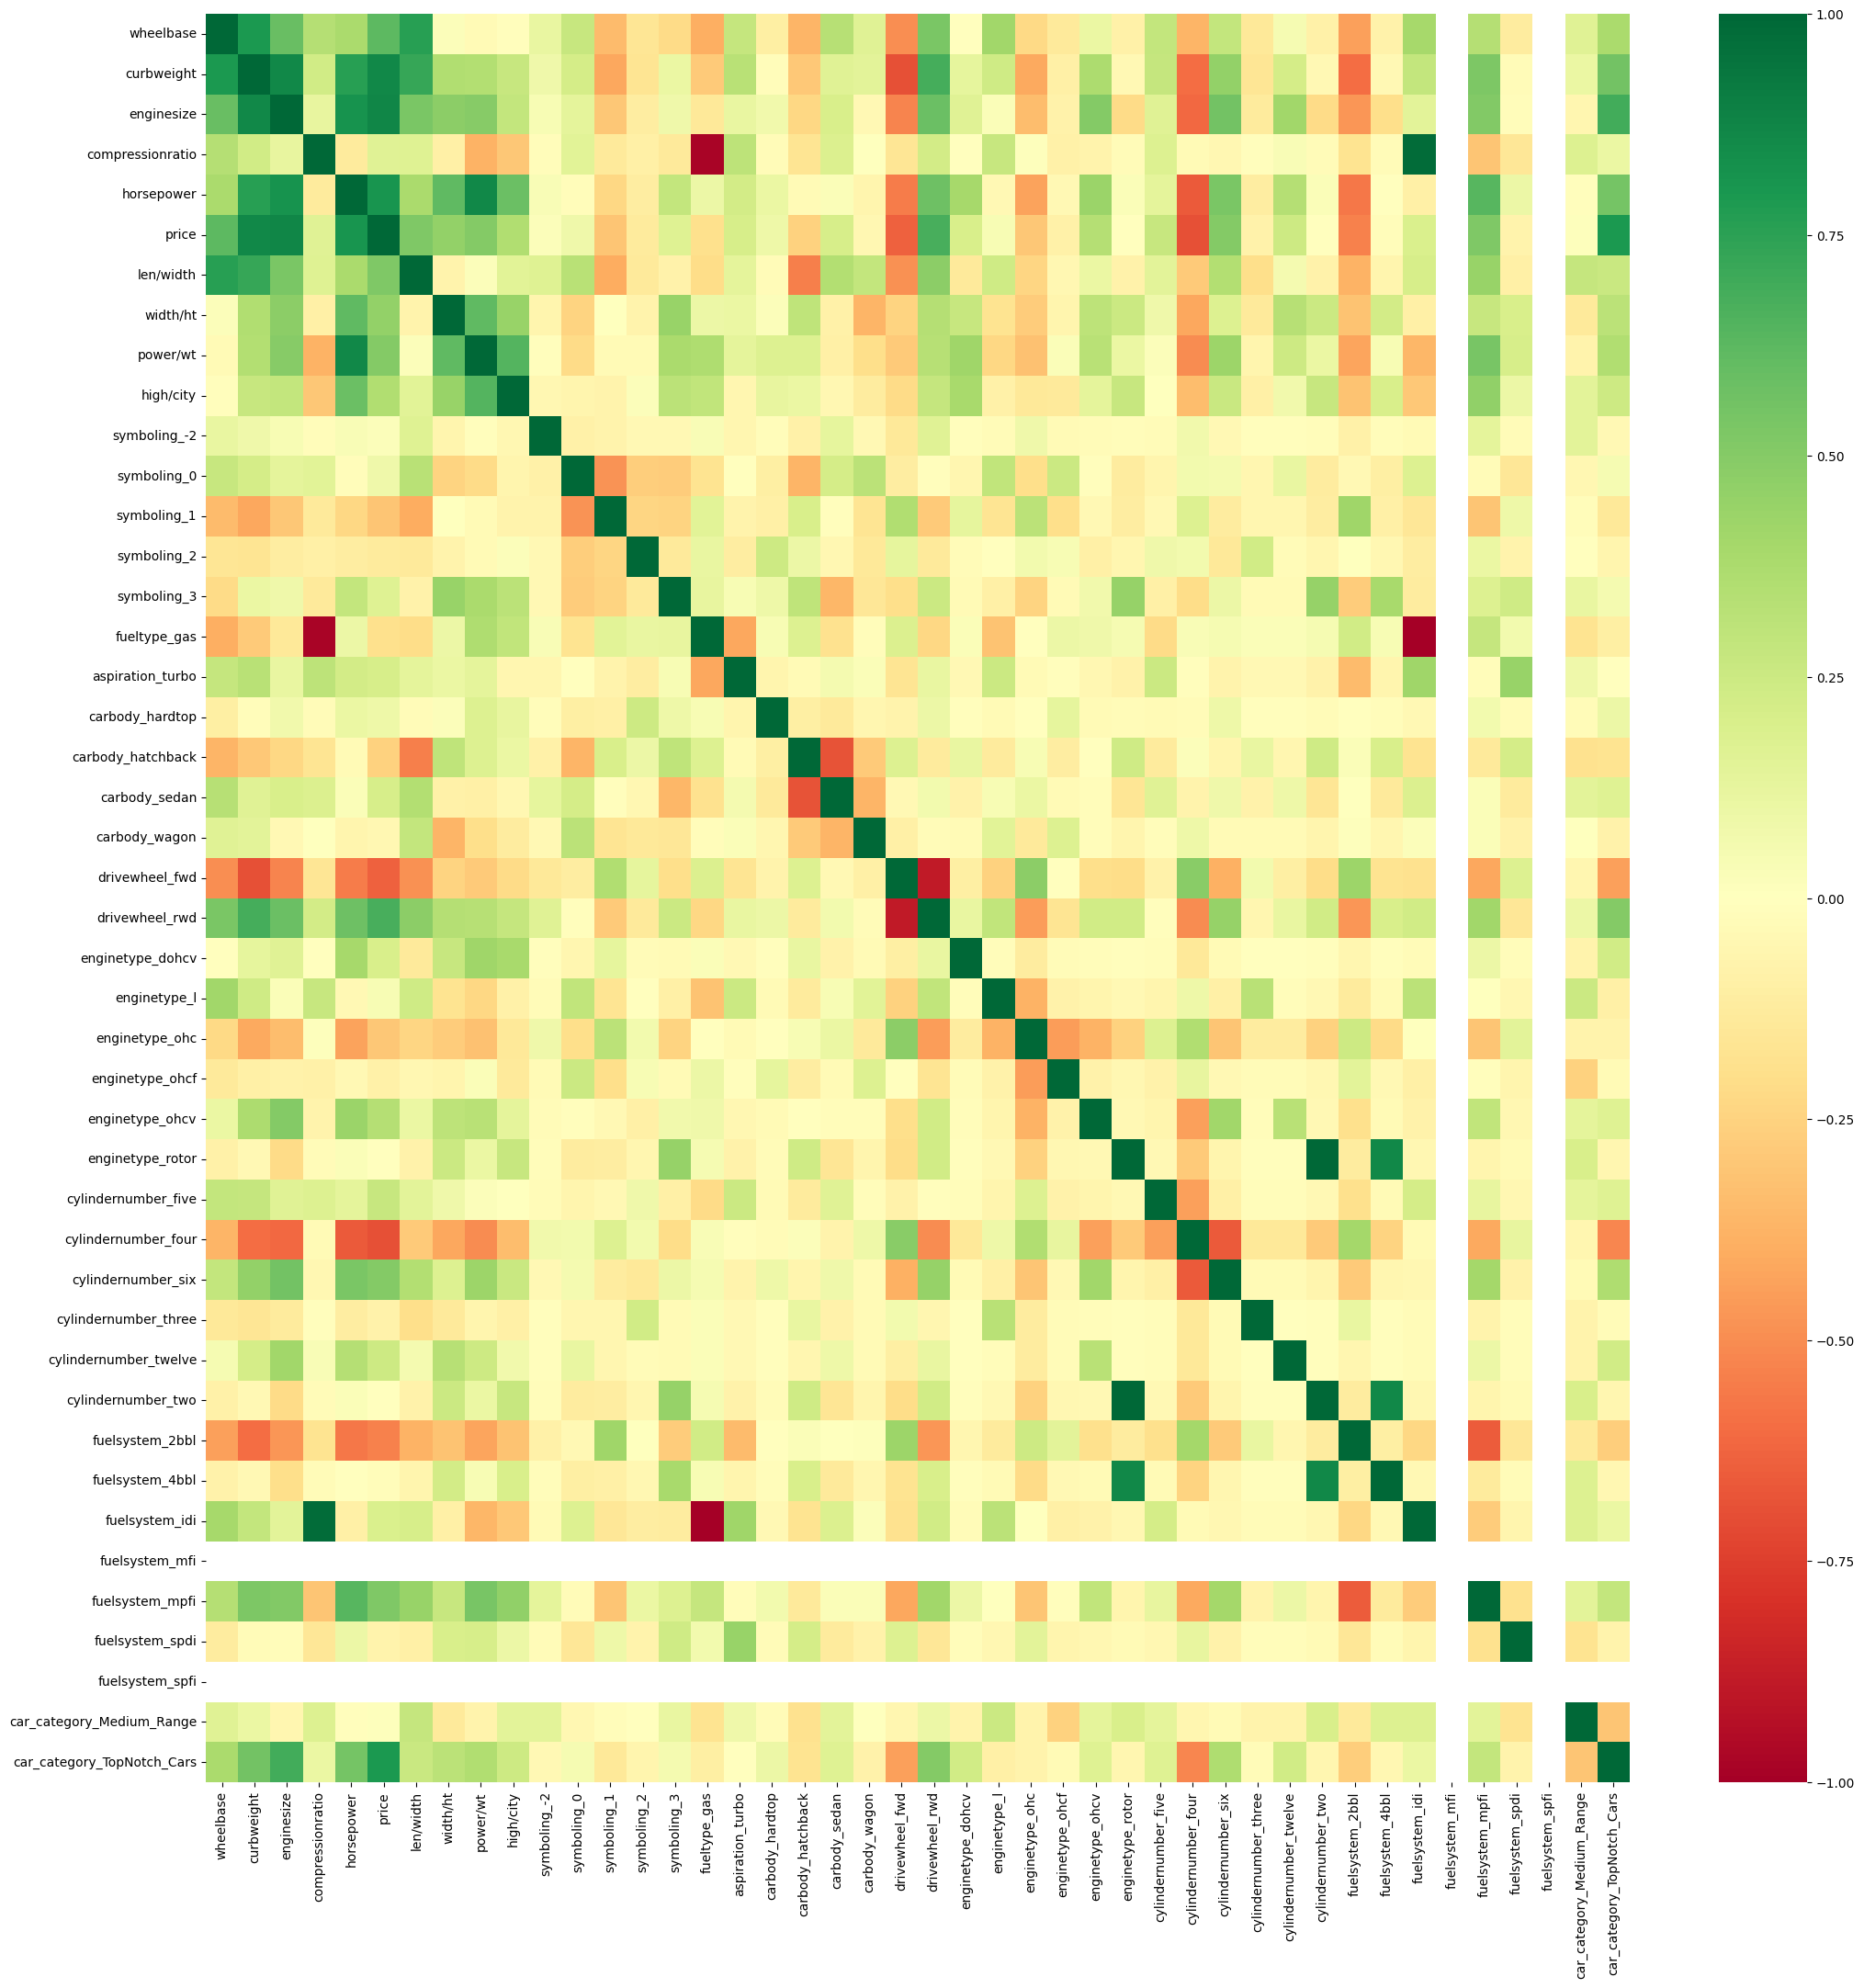

In [729]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),cmap ='RdYlGn')
plt.show()

#### Dividing into X and Y sets for the model building

In [730]:
y_train = df_train.pop('price')
X_train = df_train

### Step 6: Building a Linear Model

In [731]:
X_train_1 = X_train[['horsepower']]
X_train_lm_1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train,X_train_lm_1).fit()

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           6.05e-34
Time:                        16:41:26   Log-Likelihood:                 91.996
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.287      -0.056       0.017
horsepower     1.0506      0.065     16.179      0.000       0.922       1.179
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.578
Skew:                           1.166   Prob(JB):                     2.32e-12
Kurtosis:                       4.886   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

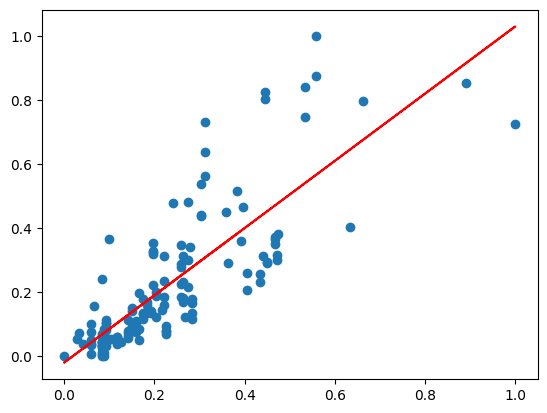

In [732]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm_1.iloc[:,1],y_train)
plt.plot(X_train_lm_1.iloc[:,1],-0.0195+1.0506*X_train_lm_1.iloc[:,1],'r')
plt.show()

#### Adding another variable
The R-squared value obtained is 0.65. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. curbweight.

In [733]:
X_train_2 = X_train[['horsepower','curbweight']]
X_train_lm_2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           3.34e-49
Time:                        16:41:27   Log-Likelihood:                 130.96
No. Observations:                 143   AIC:                            -255.9
Df Residuals:                     140   BIC:                            -247.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.401      0.000      -0.168      -0.097
horsepower     0.4666      0.076      6.114      0.000       0.316       0.617
curbweight     0.6021      0.060     10.071      0.000       0.484       0.720
==============================================================================
Omnibus:                       31.547   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.026
Skew:                           0.921   Prob(JB):                     6.22e-16
Kurtosis:                       5.891   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding another variable
The R-squared value obtained is 0.797. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. enginesize.

In [734]:
X_train_3 = X_train[['horsepower','curbweight','enginesize']]
X_train_lm_3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train,X_train_lm_3).fit()


lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.16e-51
Time:                        16:41:27   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.000      -0.161      -0.093
horsepower     0.2982      0.083      3.589      0.000       0.134       0.463
curbweight     0.4020      0.075      5.385      0.000       0.254       0.550
enginesize     0.4743      0.115      4.114      0.000       0.246       0.702
==============================================================================
Omnibus:                       25.598   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.392
Skew:                           0.751   Prob(JB):                     9.37e-13
Kurtosis:                       5.653   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [735]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values,i) for i in range(X_train_3.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
2,enginesize,18.02
1,curbweight,14.16
0,horsepower,9.05


We have achieved a R-squared of 0.819 by manually picking the highly correlated variables. Now lets use RFE to select the independent variables which accurately predicts the dependent variable price.

### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [736]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [737]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('len/width', True, 1),
 ('width/ht', False, 9),
 ('power/wt', True, 1),
 ('high/city', False, 17),
 ('symboling_-2', False, 8),
 ('symboling_0', False, 25),
 ('symboling_1', False, 24),
 ('symboling_2', False, 26),
 ('symboling_3', False, 16),
 ('fueltype_gas', False, 2),
 ('aspiration_turbo', False, 23),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', False, 27),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 12),
 ('enginetype_rotor', False, 10),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 3),
 ('cylindernumber_three', False, 14),
 ('cylindernumber_twelve', True, 

In [738]:
# Selecting the variables which are in support
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['wheelbase', 'curbweight', 'enginesize', 'compressionratio',
       'horsepower', 'len/width', 'power/wt', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'fuelsystem_idi',
       'car_category_TopNotch_Cars'],
      dtype='object')

In [739]:
X_train.columns[~rfe.support_]

Index(['width/ht', 'high/city', 'symboling_-2', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_category_Medium_Range'],
      dtype='object')

In [740]:
X_train_rfe = X_train[rfe_col]

In [741]:
# Adding a constant variable and Build a first fitted model
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.08e-68
Time:                        16:41:27   Log-Likelihood:                 214.27
No. Observations:                 143   AIC:                            -396.5
Df Residuals:                     127   BIC:                            -349.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3066      0.090      3.402      0.001       0.128       0.485
wheelbase                      0.2072      0.057      3.616      0.000       0.094       0.321
curbweight                    -0.2721      0.184     -1.479      0.141      -0.636       0.092
enginesize                    -0.2660      0.102     -2.595      0.011      -0.469      -0.063
compressionratio               0.2451      0.144      1.703      0.091      -0.040       0.530
horsepower                     2.1586      0.432      4.998      0.000       1.304       3.013
len/width                     -0.1019      0.051     -1.990      0.049      -0.203      -0.001
power/wt                      -1.1594      0.318     -3.645      0.000      -1.789      -0.530
carbody_hardtop               -0.0874      0.047     -1.844      0.068      -0.181       0.006
carbody_hatchback             -0.1606      0.035     -4.647      0.000      -0.229      -0.092
carbody_sedan                 -0.1294      0.036     -3.635      0.000      -0.200      -0.059
carbody_wagon                 -0.1682      0.037     -4.541      0.000      -0.241      -0.095
enginetype_dohcv              -0.4474      0.088     -5.099      0.000      -0.621      -0.274
cylindernumber_twelve         -0.2761      0.083     -3.318      0.001      -0.441      -0.111
fuelsystem_idi                -0.1420      0.121     -1.175      0.242      -0.381       0.097
car_category_TopNotch_Cars     0.2652      0.022     12.198      0.000       0.222       0.308
==============================================================================
Omnibus:                       28.235   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.688
Skew:                           0.761   Prob(JB):                     1.64e-16
Kurtosis:                       6.144   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)
and we need to drop it

#### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:
        $ VIF = 1/(1-R^ 2)$

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

    High p-value High VIF : Drop the variable
    High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
    Low p-value Low VIF : accept the variable

In [742]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
4,horsepower,135.74
1,curbweight,101.05
6,power/wt,98.00
3,compressionratio,70.24
13,fuelsystem_idi,48.15
5,len/width,41.10
2,enginesize,30.40
0,wheelbase,28.22
9,carbody_sedan,20.54
8,carbody_hatchback,13.42


**fuelsystem_idi** has p value =0.242 and vif = 48.15 so we drop it and hence rebuilding the model

In [743]:
X_train_rfe_1 = X_train_rfe.drop('fuelsystem_idi',axis = 1)

X_train_rfec_1 = sm.add_constant(X_train_rfe_1)
lm_rfe_1 = sm.OLS(y_train,X_train_rfec_1).fit()

lm_rfe_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           3.49e-69
Time:                        16:41:28   Log-Likelihood:                 213.49
No. Observations:                 143   AIC:                            -397.0
Df Residuals:                     128   BIC:                            -352.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3496      0.082      4.239      0.000       0.186       0.513
wheelbase                      0.2074      0.057      3.613      0.000       0.094       0.321
curbweight                    -0.3380      0.175     -1.927      0.056      -0.685       0.009
enginesize                    -0.2704      0.103     -2.636      0.009      -0.473      -0.067
compressionratio               0.0789      0.026      2.977      0.003       0.026       0.131
horsepower                     2.2606      0.424      5.335      0.000       1.422       3.099
len/width                     -0.0903      0.050     -1.795      0.075      -0.190       0.009
power/wt                      -1.2393      0.311     -3.982      0.000      -1.855      -0.624
carbody_hardtop               -0.0837      0.047     -1.766      0.080      -0.177       0.010
carbody_hatchback             -0.1630      0.035     -4.716      0.000      -0.231      -0.095
carbody_sedan                 -0.1329      0.036     -3.741      0.000      -0.203      -0.063
carbody_wagon                 -0.1713      0.037     -4.632      0.000      -0.245      -0.098
enginetype_dohcv              -0.4354      0.087     -4.989      0.000      -0.608      -0.263
cylindernumber_twelve         -0.2479      0.080     -3.106      0.002      -0.406      -0.090
car_category_TopNotch_Cars     0.2689      0.022     12.481      0.000       0.226       0.312
==============================================================================
Omnibus:                       25.786   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.166
Skew:                           0.747   Prob(JB):                     3.86e-13
Kurtosis:                       5.713   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [744]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.values,i) for i in range(X_train_rfe_1.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
4,horsepower,116.29
1,curbweight,100.75
6,power/wt,85.14
5,len/width,38.50
2,enginesize,29.53
0,wheelbase,27.86
9,carbody_sedan,20.19
8,carbody_hatchback,12.98
10,carbody_wagon,6.16
3,compressionratio,2.80


**horsepower** has vif = 116.29 so we drop it and hence rebuilding the model

In [745]:
X_train_rfe_2 = X_train_rfe_1.drop('horsepower',axis = 1)

X_train_rfec_2 = sm.add_constant(X_train_rfe_2)
lm_rfe_2 = sm.OLS(y_train,X_train_rfec_2).fit()

lm_rfe_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.10e-64
Time:                        16:41:28   Log-Likelihood:                 199.14
No. Observations:                 143   AIC:                            -370.3
Df Residuals:                     129   BIC:                            -328.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0465      0.040     -1.176      0.242      -0.125       0.032
wheelbase                      0.1437      0.062      2.324      0.022       0.021       0.266
curbweight                     0.4933      0.089      5.557      0.000       0.318       0.669
enginesize                    -0.0059      0.099     -0.060      0.952      -0.202       0.190
compressionratio               0.0566      0.029      1.966      0.051      -0.000       0.114
len/width                     -0.0750      0.055     -1.355      0.178      -0.184       0.034
power/wt                       0.3876      0.068      5.662      0.000       0.252       0.523
carbody_hardtop               -0.0663      0.052     -1.273      0.205      -0.169       0.037
carbody_hatchback             -0.1239      0.037     -3.330      0.001      -0.197      -0.050
carbody_sedan                 -0.0962      0.038     -2.507      0.013      -0.172      -0.020
carbody_wagon                 -0.1321      0.040     -3.309      0.001      -0.211      -0.053
enginetype_dohcv              -0.1557      0.077     -2.026      0.045      -0.308      -0.004
cylindernumber_twelve         -0.0416      0.077     -0.541      0.589      -0.194       0.111
car_category_TopNotch_Cars     0.2587      0.024     10.945      0.000       0.212       0.305
==============================================================================
Omnibus:                       41.114   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.963
Skew:                           1.063   Prob(JB):                     2.69e-28
Kurtosis:                       7.097   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [746]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values,i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,curbweight,59.26
4,len/width,35.94
2,enginesize,28.53
0,wheelbase,27.64
5,power/wt,17.35
8,carbody_sedan,12.84
7,carbody_hatchback,6.98
9,carbody_wagon,4.12
3,compressionratio,2.59
12,car_category_TopNotch_Cars,2.36


**enginesize** has p_value = 0.952 so we drop it and hence rebuilding the model

In [747]:
X_train_rfe_3 = X_train_rfe_2.drop('enginesize',axis = 1)

X_train_rfec_3 = sm.add_constant(X_train_rfe_3)
lm_rfe_3 = sm.OLS(y_train,X_train_rfec_3).fit()

lm_rfe_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     127.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           9.54e-66
Time:                        16:41:28   Log-Likelihood:                 199.13
No. Observations:                 143   AIC:                            -372.3
Df Residuals:                     130   BIC:                            -333.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0467      0.039     -1.186      0.238      -0.125       0.031
wheelbase                      0.1440      0.061      2.342      0.021       0.022       0.266
curbweight                     0.4901      0.071      6.932      0.000       0.350       0.630
compressionratio               0.0567      0.029      1.980      0.050    5.72e-05       0.113
len/width                     -0.0749      0.055     -1.360      0.176      -0.184       0.034
power/wt                       0.3870      0.067      5.743      0.000       0.254       0.520
carbody_hardtop               -0.0664      0.052     -1.281      0.202      -0.169       0.036
carbody_hatchback             -0.1237      0.037     -3.347      0.001      -0.197      -0.051
carbody_sedan                 -0.0961      0.038     -2.516      0.013      -0.172      -0.021
carbody_wagon                 -0.1317      0.039     -3.355      0.001      -0.209      -0.054
enginetype_dohcv              -0.1554      0.076     -2.033      0.044      -0.307      -0.004
cylindernumber_twelve         -0.0436      0.069     -0.629      0.530      -0.181       0.093
car_category_TopNotch_Cars     0.2581      0.021     12.085      0.000       0.216       0.300
==============================================================================
Omnibus:                       41.093   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.487
Skew:                           1.064   Prob(JB):                     3.42e-28
Kurtosis:                       7.087   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [748]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values,i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,curbweight,37.78
3,len/width,35.94
0,wheelbase,27.46
4,power/wt,16.82
7,carbody_sedan,12.84
6,carbody_hatchback,6.97
8,carbody_wagon,4.02
2,compressionratio,2.58
11,car_category_TopNotch_Cars,1.95
5,carbody_hardtop,1.62


In [749]:
# dropping cylindernumber_twelve

In [750]:
X_train_rfe_4 = X_train_rfe_3.drop('cylindernumber_twelve',axis = 1)

X_train_rfec_4 = sm.add_constant(X_train_rfe_4)
lm_rfe_4 = sm.OLS(y_train,X_train_rfec_4).fit()

lm_rfe_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     139.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           9.57e-67
Time:                        16:41:28   Log-Likelihood:                 198.92
No. Observations:                 143   AIC:                            -373.8
Df Residuals:                     131   BIC:                            -338.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0434      0.039     -1.114      0.267      -0.120       0.034
wheelbase                      0.1494      0.061      2.462      0.015       0.029       0.270
curbweight                     0.4826      0.070      6.941      0.000       0.345       0.620
compressionratio               0.0551      0.028      1.936      0.055      -0.001       0.111
len/width                     -0.0712      0.055     -1.302      0.195      -0.179       0.037
power/wt                       0.3809      0.067      5.725      0.000       0.249       0.513
carbody_hardtop               -0.0669      0.052     -1.293      0.198      -0.169       0.035
carbody_hatchback             -0.1258      0.037     -3.425      0.001      -0.198      -0.053
carbody_sedan                 -0.0996      0.038     -2.638      0.009      -0.174      -0.025
carbody_wagon                 -0.1351      0.039     -3.480      0.001      -0.212      -0.058
enginetype_dohcv              -0.1470      0.075     -1.958      0.052      -0.296       0.002
car_category_TopNotch_Cars     0.2570      0.021     12.101      0.000       0.215       0.299
==============================================================================
Omnibus:                       43.289   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.777
Skew:                           1.116   Prob(JB):                     1.99e-30
Kurtosis:                       7.239   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [751]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_4.values,i) for i in range(X_train_rfe_4.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,curbweight,36.77
3,len/width,35.02
0,wheelbase,27.08
4,power/wt,16.60
7,carbody_sedan,12.79
6,carbody_hatchback,6.96
8,carbody_wagon,4.00
2,compressionratio,2.57
10,car_category_TopNotch_Cars,1.93
5,carbody_hardtop,1.61


**len/width** has p value =0.195 and vif = 35.02 so we drop it and hence rebuilding the model

In [752]:
X_train_rfe_5 = X_train_rfe_4.drop('len/width',axis = 1)

X_train_rfec_5 = sm.add_constant(X_train_rfe_5)
lm_rfe_5 = sm.OLS(y_train,X_train_rfec_5).fit()

lm_rfe_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     152.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.74e-67
Time:                        16:41:29   Log-Likelihood:                 198.00
No. Observations:                 143   AIC:                            -374.0
Df Residuals:                     132   BIC:                            -341.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0600      0.037     -1.630      0.106      -0.133       0.013
wheelbase                      0.1281      0.059      2.186      0.031       0.012       0.244
curbweight                     0.4494      0.065      6.930      0.000       0.321       0.578
compressionratio               0.0611      0.028      2.169      0.032       0.005       0.117
power/wt                       0.3820      0.067      5.726      0.000       0.250       0.514
carbody_hardtop               -0.0734      0.052     -1.422      0.157      -0.175       0.029
carbody_hatchback             -0.1241      0.037     -3.373      0.001      -0.197      -0.051
carbody_sedan                 -0.1063      0.037     -2.837      0.005      -0.180      -0.032
carbody_wagon                 -0.1441      0.038     -3.763      0.000      -0.220      -0.068
enginetype_dohcv              -0.1258      0.073     -1.711      0.089      -0.271       0.020
car_category_TopNotch_Cars     0.2630      0.021     12.655      0.000       0.222       0.304
==============================================================================
Omnibus:                       38.527   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.027
Skew:                           1.040   Prob(JB):                     1.56e-23
Kurtosis:                       6.647   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [753]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values,i) for i in range(X_train_rfe_5.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,curbweight,30.92
0,wheelbase,25.72
3,power/wt,16.51
6,carbody_sedan,9.12
5,carbody_hatchback,6.09
7,carbody_wagon,2.71
2,compressionratio,2.55
9,car_category_TopNotch_Cars,1.82
4,carbody_hardtop,1.48
8,enginetype_dohcv,1.32


**carbody_hardtop** has p value =0.157  so we drop it and hence rebuilding the model

In [754]:
X_train_rfe_6 = X_train_rfe_5.drop('carbody_hardtop',axis = 1)

X_train_rfec_6 = sm.add_constant(X_train_rfe_6)
lm_rfe_6 = sm.OLS(y_train,X_train_rfec_6).fit()

lm_rfe_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           3.53e-68
Time:                        16:41:29   Log-Likelihood:                 196.91
No. Observations:                 143   AIC:                            -373.8
Df Residuals:                     133   BIC:                            -344.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0869      0.032     -2.740      0.007      -0.150      -0.024
wheelbase                      0.1045      0.056      1.852      0.066      -0.007       0.216
curbweight                     0.4799      0.061      7.813      0.000       0.358       0.601
compressionratio               0.0547      0.028      1.959      0.052      -0.001       0.110
power/wt                       0.3528      0.064      5.536      0.000       0.227       0.479
carbody_hatchback             -0.0893      0.028     -3.236      0.002      -0.144      -0.035
carbody_sedan                 -0.0713      0.028     -2.514      0.013      -0.127      -0.015
carbody_wagon                 -0.1123      0.031     -3.600      0.000      -0.174      -0.051
enginetype_dohcv              -0.1139      0.073     -1.554      0.123      -0.259       0.031
car_category_TopNotch_Cars     0.2611      0.021     12.539      0.000       0.220       0.302
==============================================================================
Omnibus:                       36.939   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.512
Skew:                           0.990   Prob(JB):                     9.06e-23
Kurtosis:                       6.621   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [755]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_6.values,i) for i in range(X_train_rfe_6.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,curbweight,28.36
0,wheelbase,23.90
3,power/wt,11.95
5,carbody_sedan,7.04
4,carbody_hatchback,4.62
6,carbody_wagon,2.40
2,compressionratio,2.33
8,car_category_TopNotch_Cars,1.82
7,enginetype_dohcv,1.24


**enginetype_dohcv** has p value =0.123  so we drop it and hence rebuilding the model

In [756]:
X_train_rfe_7 = X_train_rfe_6.drop('enginetype_dohcv',axis = 1)

X_train_rfec_7 = sm.add_constant(X_train_rfe_7)
lm_rfe_7 = sm.OLS(y_train,X_train_rfec_7).fit()

lm_rfe_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           8.22e-69
Time:                        16:41:29   Log-Likelihood:                 195.62
No. Observations:                 143   AIC:                            -373.2
Df Residuals:                     134   BIC:                            -346.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0733      0.031     -2.393      0.018      -0.134      -0.013
wheelbase                      0.0994      0.057      1.757      0.081      -0.013       0.211
curbweight                     0.4936      0.061      8.077      0.000       0.373       0.614
compressionratio               0.0448      0.027      1.640      0.103      -0.009       0.099
power/wt                       0.3123      0.058      5.343      0.000       0.197       0.428
carbody_hatchback             -0.0930      0.028     -3.364      0.001      -0.148      -0.038
carbody_sedan                 -0.0738      0.028     -2.592      0.011      -0.130      -0.017
carbody_wagon                 -0.1185      0.031     -3.813      0.000      -0.180      -0.057
car_category_TopNotch_Cars     0.2567      0.021     12.378      0.000       0.216       0.298
==============================================================================
Omnibus:                       39.476   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.611
Skew:                           1.049   Prob(JB):                     3.52e-25
Kurtosis:                       6.808   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [757]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_7.values,i) for i in range(X_train_rfe_7.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,curbweight,27.73
0,wheelbase,23.85
3,power/wt,10.68
5,carbody_sedan,6.77
4,carbody_hatchback,4.49
6,carbody_wagon,2.38
2,compressionratio,2.27
7,car_category_TopNotch_Cars,1.76


**compressionratio** has p value =0.103 so we drop it and hence rebuilding the model

In [758]:
X_train_rfe_8 = X_train_rfe_7.drop('compressionratio',axis = 1)

X_train_rfec_8 = sm.add_constant(X_train_rfe_8)
lm_rfe_8 = sm.OLS(y_train,X_train_rfec_8).fit()

lm_rfe_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.05e-69
Time:                        16:41:29   Log-Likelihood:                 194.20
No. Observations:                 143   AIC:                            -372.4
Df Residuals:                     135   BIC:                            -348.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0604      0.030     -2.026      0.045      -0.119      -0.001
wheelbase                      0.0972      0.057      1.707      0.090      -0.015       0.210
curbweight                     0.5169      0.060      8.643      0.000       0.399       0.635
power/wt                       0.2671      0.052      5.149      0.000       0.165       0.370
carbody_hatchback             -0.0917      0.028     -3.298      0.001      -0.147      -0.037
carbody_sedan                 -0.0729      0.029     -2.544      0.012      -0.130      -0.016
carbody_wagon                 -0.1227      0.031     -3.938      0.000      -0.184      -0.061
car_category_TopNotch_Cars     0.2588      0.021     12.429      0.000       0.218       0.300
==============================================================================
Omnibus:                       36.573   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.584
Skew:                           1.014   Prob(JB):                     7.86e-21
Kurtosis:                       6.380   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [759]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_8.values,i) for i in range(X_train_rfe_8.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,curbweight,25.95
0,wheelbase,23.84
2,power/wt,8.87
4,carbody_sedan,6.17
3,carbody_hatchback,4.04
5,carbody_wagon,2.33
6,car_category_TopNotch_Cars,1.76


**curbweight** has VIF = 25.95 so we drop it and hence rebuilding the model

In [760]:
X_train_rfe_9 = X_train_rfe_8.drop('wheelbase',axis = 1)

X_train_rfec_9 = sm.add_constant(X_train_rfe_9)
lm_rfe_9 = sm.OLS(y_train,X_train_rfec_9).fit()

lm_rfe_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     242.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.31e-70
Time:                        16:41:29   Log-Likelihood:                 192.68
No. Observations:                 143   AIC:                            -371.4
Df Residuals:                     136   BIC:                            -350.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0592      0.030     -1.974      0.050      -0.119    9.19e-05
curbweight                     0.6012      0.034     17.687      0.000       0.534       0.668
power/wt                       0.2246      0.046      4.901      0.000       0.134       0.315
carbody_hatchback             -0.0760      0.026     -2.876      0.005      -0.128      -0.024
carbody_sedan                 -0.0521      0.026     -1.995      0.048      -0.104      -0.000
carbody_wagon                 -0.1068      0.030     -3.566      0.001      -0.166      -0.048
car_category_TopNotch_Cars     0.2578      0.021     12.297      0.000       0.216       0.299
==============================================================================
Omnibus:                       36.819   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.372
Skew:                           1.050   Prob(JB):                     1.07e-19
Kurtosis:                       6.202   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [761]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_9.values,i) for i in range(X_train_rfe_9.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
0,curbweight,7.94
1,power/wt,6.57
3,carbody_sedan,3.51
2,carbody_hatchback,2.92
4,carbody_wagon,1.89
5,car_category_TopNotch_Cars,1.76


**carbody_sedan** has p value = 0.048 so we drop it and hence rebuilding the model

In [762]:
X_train_rfe_10 = X_train_rfe_9.drop('carbody_sedan',axis = 1)

X_train_rfec_10 = sm.add_constant(X_train_rfe_10)
lm_rfe_10 = sm.OLS(y_train,X_train_rfec_10).fit()

lm_rfe_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     283.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.11e-70
Time:                        16:41:29   Log-Likelihood:                 190.61
No. Observations:                 143   AIC:                            -369.2
Df Residuals:                     137   BIC:                            -351.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1087      0.017     -6.385      0.000      -0.142      -0.075
curbweight                     0.5947      0.034     17.389      0.000       0.527       0.662
power/wt                       0.2407      0.046      5.278      0.000       0.151       0.331
carbody_hatchback             -0.0299      0.013     -2.311      0.022      -0.055      -0.004
carbody_wagon                 -0.0579      0.017     -3.327      0.001      -0.092      -0.024
car_category_TopNotch_Cars     0.2600      0.021     12.286      0.000       0.218       0.302
==============================================================================
Omnibus:                       31.317   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.871
Skew:                           0.966   Prob(JB):                     3.67e-14
Kurtosis:                       5.579   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [763]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_10.values,i) for i in range(X_train_rfe_10.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
1,power/wt,5.84
0,curbweight,5.79
2,carbody_hatchback,1.77
4,car_category_TopNotch_Cars,1.59
3,carbody_wagon,1.31


**carbody_hatchback** has p value = 0.022 so we drop it and hence rebuilding the model

In [764]:
X_train_rfe_11 = X_train_rfe_10.drop('carbody_hatchback',axis = 1)

X_train_rfec_11 = sm.add_constant(X_train_rfe_11)
lm_rfe_11 = sm.OLS(y_train,X_train_rfec_11).fit()

lm_rfe_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     342.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.46e-70
Time:                        16:41:30   Log-Likelihood:                 187.88
No. Observations:                 143   AIC:                            -365.8
Df Residuals:                     138   BIC:                            -350.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1202      0.017     -7.260      0.000      -0.153      -0.087
curbweight                     0.6144      0.034     18.266      0.000       0.548       0.681
power/wt                       0.2122      0.045      4.759      0.000       0.124       0.300
carbody_wagon                 -0.0498      0.017     -2.877      0.005      -0.084      -0.016
car_category_TopNotch_Cars     0.2654      0.021     12.430      0.000       0.223       0.308
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.728
Skew:                           1.127   Prob(JB):                     5.93e-17
Kurtosis:                       5.731   Cond. No.                         9.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [765]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_11.values,i) for i in range(X_train_rfe_11.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by = 'VIF', ascending = False,inplace = True)

vif

,Features,VIF
0,curbweight,5.72
1,power/wt,4.41
3,car_category_TopNotch_Cars,1.51
2,carbody_wagon,1.28


Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model lm_rfe_10.

## Step 7: Residual Analysis of the train data

### Model 1 
     -- With lm_rfe_10 which has basically 5 predictor variables.
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [766]:
y_train_pred = lm_rfe_10.predict(X_train_rfec_10)

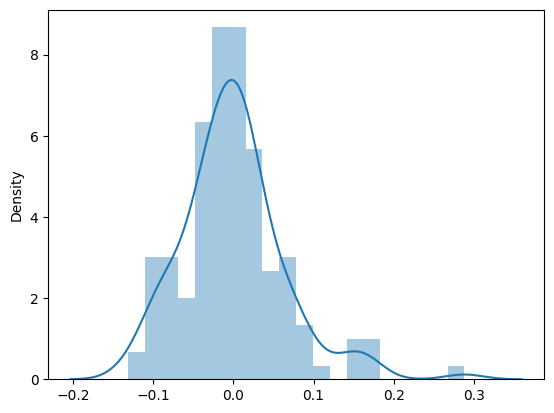

In [767]:
res = y_train - y_train_pred
# Distribution of residuals or error terms
plt.figure()
sns.distplot(res, bins = 20)
plt.show()

The above plots show that the error terms are normally distributed with mean value at 0.

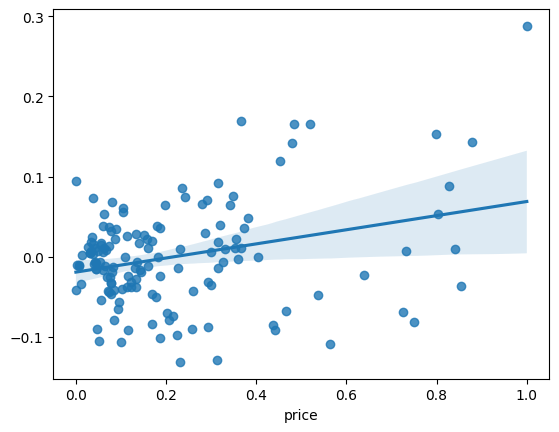

In [768]:
# plotting residuals  error terms in scatter plot
plt.figure()
sns.regplot(x = y_train,y = res)
plt.show()

The above plots show that the error terms have a constant variance.

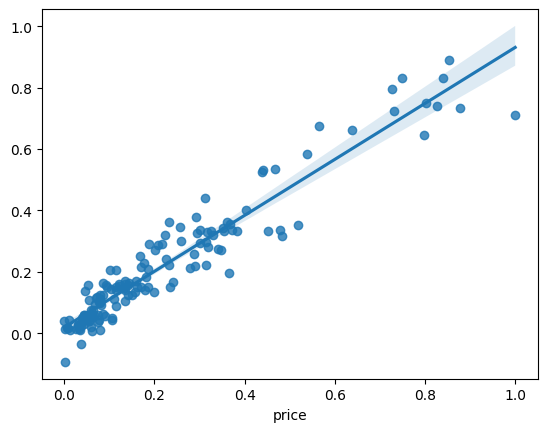

In [769]:
# Plotting y_train and y_train_pred to understand the spread.
plt.figure()
sns.regplot(x = y_train,y = y_train_pred)
plt.show()

The line that has been plotted based on beta coefficients represent the data points pretty well

### Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

Applying the scaling on testset.

In [770]:
df_test[scale_var] = scaler.transform(df_test[scale_var])

In [771]:
df_test[scale_var].head()

,wheelbase,curbweight,enginesize,compressionratio,horsepower,price,len/width,width/ht,power/wt,high/city
160,0.313793,0.235066,0.139623,0.12500,0.091667,0.072382,0.495186,0.346648,0.205607,0.366029
186,0.368966,0.305275,0.181132,0.12500,0.154167,0.093295,0.555771,0.248975,0.265550,0.400673
59,0.420690,0.347944,0.230189,0.10000,0.150000,0.102964,0.636874,0.404693,0.232903,0.356643
165,0.272414,0.301396,0.139623,0.15000,0.266667,0.115479,0.578350,0.350729,0.449708,0.178322
140,0.231034,0.291699,0.177358,0.10625,0.104167,0.068652,0.314126,0.172834,0.192814,0.297203


In [772]:
df_test[scale_var].describe()

,wheelbase,curbweight,enginesize,compressionratio,horsepower,price,len/width,width/ht,power/wt,high/city
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.428470,0.265673,0.209375,0.248858,0.239439,0.607433,0.365054,0.319133,0.367925
std,0.212861,0.179488,0.162820,0.273690,0.163376,0.233076,0.186206,0.134550,0.159380,0.133403
min,0.000000,0.128394,0.067925,0.000000,0.016667,0.007763,0.000000,0.010292,0.046209,0.000000
25%,0.313793,0.305275,0.177358,0.093750,0.107292,0.092342,0.541808,0.273343,0.218895,0.304833
50%,0.387931,0.406129,0.226415,0.125000,0.218750,0.158991,0.596078,0.346648,0.278451,0.375921
75%,0.570690,0.564876,0.316038,0.150000,0.295833,0.317243,0.723021,0.460109,0.409660,0.406699
max,1.182759,0.935609,0.932075,1.000000,0.662500,1.112855,1.000000,0.723608,0.840724,0.727273


In [773]:
## Dividing test set into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [774]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new  = X_test_1[X_train_rfec_10.columns]

X_test_new.head()

,const,curbweight,power/wt,carbody_hatchback,carbody_wagon,car_category_TopNotch_Cars
160,1.0,0.235066,0.205607,0.0,0.0,0.0
186,1.0,0.305275,0.265550,0.0,0.0,0.0
59,1.0,0.347944,0.232903,1.0,0.0,0.0
165,1.0,0.301396,0.449708,0.0,0.0,0.0
140,1.0,0.291699,0.192814,1.0,0.0,0.0


In [775]:
# Making predictions using the final model
y_test_pred = lm_rfe_10.predict(X_test_new)

## Step 9: Model Evaluation

In [776]:
res_test = y_test - y_test_pred

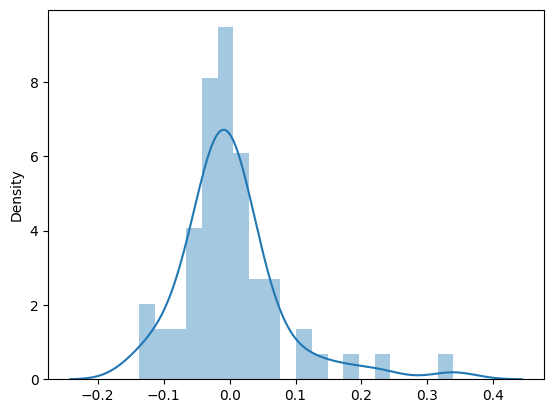

In [777]:
# Distribution of residuals or error terms
plt.figure()
sns.distplot(res_test, bins = 20)
plt.show()

The above plots show that the error terms are normally distributed with mean value at 0.

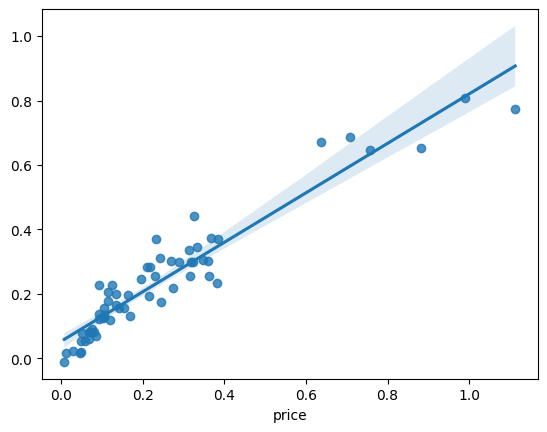

In [778]:
# Plotting y_train and y_train_pred to understand the spread.
plt.figure()
sns.regplot(x = y_test,y = y_test_pred)
plt.show()

**RMSE Score**

In [779]:
r2_score(y_test,y_test_pred)

0.8855848722518085

Text(0, 0.5, 'Y_values')

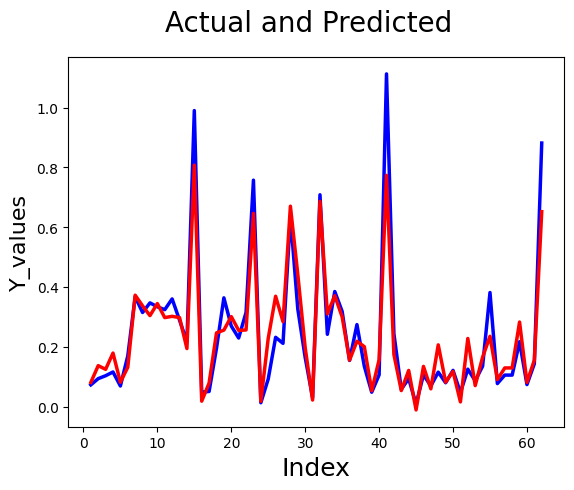

In [780]:
### Plotting the actual and predicted price values from the test dataset so check the likeness
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Y_values', fontsize=16)  

The R2 score of Training set is 0.912 and Test set is 0.885 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables
    -- curbweight
    -- power/wt
    -- carbody_hatchback
    -- carbody_wagon
    -- car_category_TopNotch_Cars
    
Equation of Line to predict the Car prices values
$car_price = -0.1087 + 0.5947*curbweight+ 0.2407*power/wt - 0.0299*carbody hatchback - 0.0579carbody wagon + 0.2600car category TopNotch Cars$
    

#### Model I Conclusions:
    R-sqaured and Adjusted R-squared - 0.912 and 0.885 - around 88% variance explained.
    F-stats and Prob(F-stats) (overall model fit) 283.5 and 2.11e-70(approx. 0.0) - Model fit is significant and explained 88%
    variance is just not by chance.
    p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
    predictors are statistically significant.


## Step 7: Residual Analysis of the train data
### model 2

    -- With lm_rfe_11 which has basically 4 predictor variables.
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [781]:
# Making predictions using the final model
y_train_pred_1 = lm_rfe_11.predict(X_train_rfec_11)

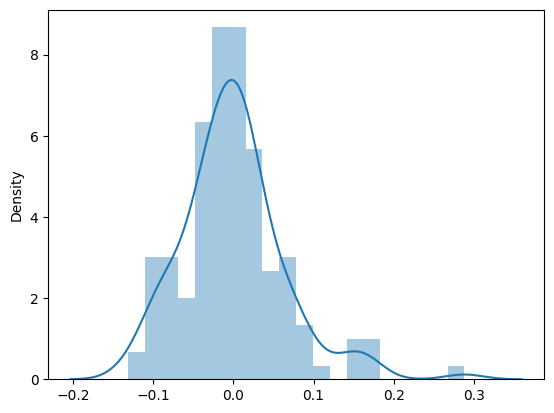

In [782]:
res_1 = y_train - y_train_pred_1
# Distribution of residuals or error terms
plt.figure()
sns.distplot(res, bins = 20)
plt.show()

The above plots show that the error terms are normally distributed with mean value at 0.

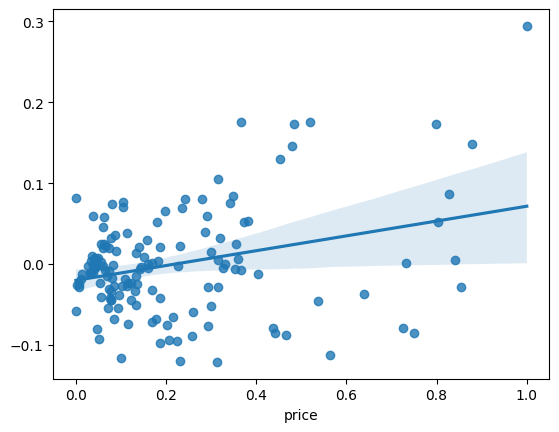

In [783]:
# plotting residuals  error terms in scatter plot
plt.figure()
sns.regplot(x = y_train,y = res_1)
plt.show()

The above plots show that the error terms have a constant variance.

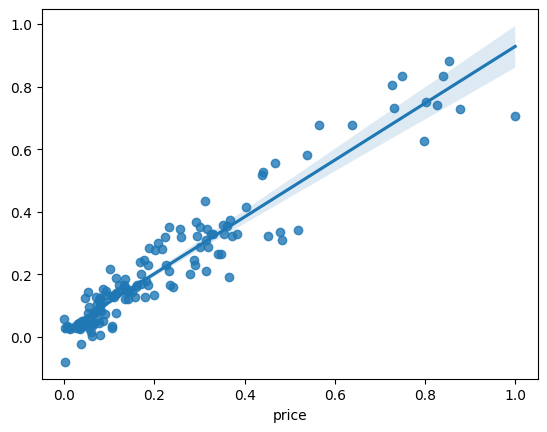

In [784]:
# Plotting y_train and y_train_pred to understand the spread.
plt.figure()
sns.regplot(x = y_train,y = y_train_pred_1)
plt.show()

The line that has been plotted based on beta coefficients represent the data points pretty well

### Step 8: Making Predictions Using the Final Model

In [785]:
X_test_new_1 = X_test_1[X_train_rfec_11.columns]

In [786]:
# Making predictions using the final model
y_test_pred_1 = lm_rfe_11.predict(X_test_new_1)

## Step 9: Model Evaluation

In [787]:
res_test_1 = y_test - y_test_pred_1

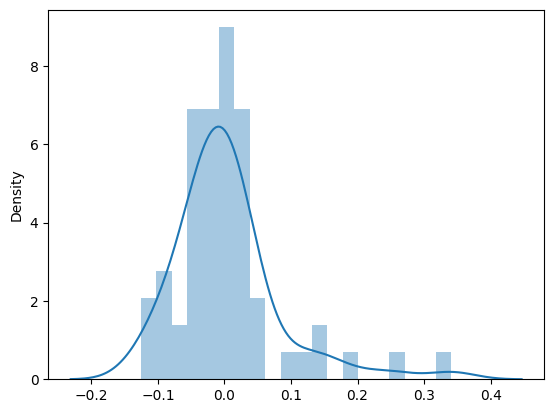

In [788]:
# Distribution of residuals or error terms
plt.figure()
sns.distplot(res_test_1, bins = 20)
plt.show()

The above plots show that the error terms are normally distributed with mean value at 0.

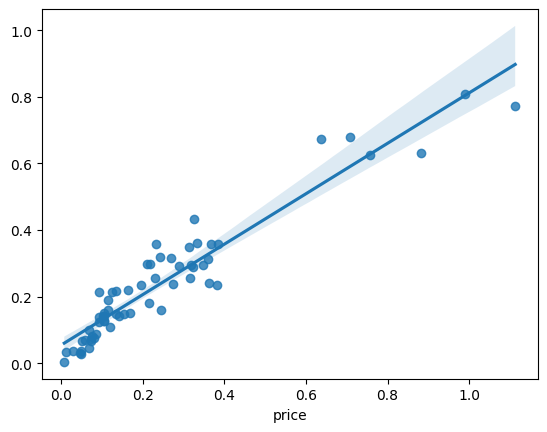

In [789]:
# Plotting y_train and y_train_pred to understand the spread.
plt.figure()
sns.regplot(x = y_test,y = y_test_pred_1)
plt.show()

The above plots show that the error terms have a constant variance.

### RMSE Score

In [790]:
r2_score(y_test,y_test_pred_1)

0.8811586342197133

Text(0, 0.5, 'Y_values')

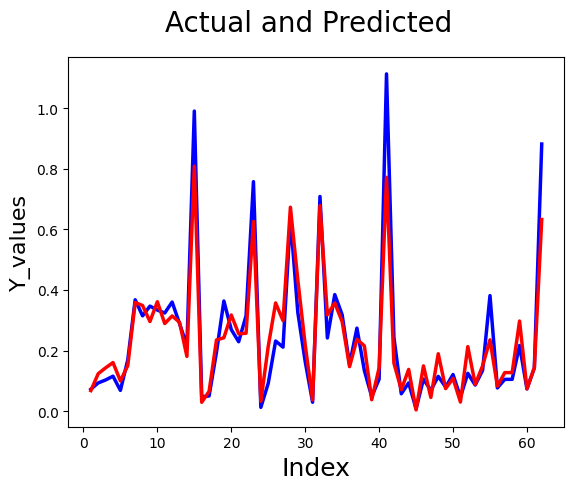

In [791]:
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_1, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Y_values', fontsize=16) 

The R2 score of Training set is 0.908 and Test set is 0.881 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables

            -- curbweight
            -- power/wt
            -- carbody_wagon
            -- car_category_TopNotch_Cars

Equation of Line to predict the Car prices values
$car_price = -0.1202 + 0.6144*curbweight+ 0.2122power/wt - 0.0498carbody wagon + 0.2654car category TopNotch Cars$
    

#### Model II Conclusions:
    R-sqaured and Adjusted R-squared - 0.908 and 0.881 - around 88% variance explained.
    F-stats and Prob(F-stats) (overall model fit) 343.3 and 1.46e-70(approx. 0.0) - Model fit is significant and explained 88%
    variance is just not by chance.
    p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
    predictors are statistically significant.


| properties | model 1 | model 2 |
|:--------:|:--------:|:--------:|
|  R-squared   |  0.912    |  0.908   |
|  Adj. R-squared   | 0.909   |  0.906   |
| test_r2_score  |  0.885   |  0.881  |
| F-statistic  | 283.5   |  342.3   |
| Prob (F-statistic) | 2.11e-70  |  1.46e-70  |

## The overall model fit for the Model 2 was good.